In [226]:
import pandas as pd
import numpy as np
import math
from os.path import join
from collections import defaultdict
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import MaxNLocator
%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

In [227]:
def boxplot(data, table, filename, _range='range'):
    print(_range)
    d = []
    label = []
    for k in data:
        d.append(data[k])
        label.append(table[k])
    fig, ax = plt.subplots(dpi=900)
    boxplot_dict = ax.boxplot(d)
    plt.xticks([x+1 for x in range(len(d))] , label)
    
    color_dict = {'A':'orange', 'B':'blue', 'C':'green', 'D': 'yellow', 'E': 'RED'}
    i=0
    for b in boxplot_dict['boxes']:
        lab = ax.get_xticklabels()[i].get_text()
        print("Label property of box {0} is {1}".format(i, lab))
        b.set_color(color_dict[lab])
        for k in data:
            if table[k] == lab:
                b.set_label("{0}: {1}".format(lab, k))
        i += 1
    plt.ylabel("実行時間（sec）")
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

In [228]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter_med(data, table, filename):
    label = []
    xtick = []
    value = []
    for k in data:
        for v in data[k]:
            value.append(v)
            label.append("{0}: {1}".format(table[k], k))
        xtick.append(table[k])
    df = pd.DataFrame({
        "category": label,
        "実行時間(sec)": value
    })
    meds = []
    for k in data:
        med = df.loc[df["category"] == "{0}: {1}".format(table[k], k)].median()['実行時間(sec)']
        meds.append(med)
    fig, ax = plt.subplots(dpi=900)
    sns.stripplot(x="category", y="実行時間(sec)", edgecolor="none", hue="category", palette="Set1", data=df, jitter=True)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    ax.set_xlabel('')
    ax.set_xticklabels(xtick)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

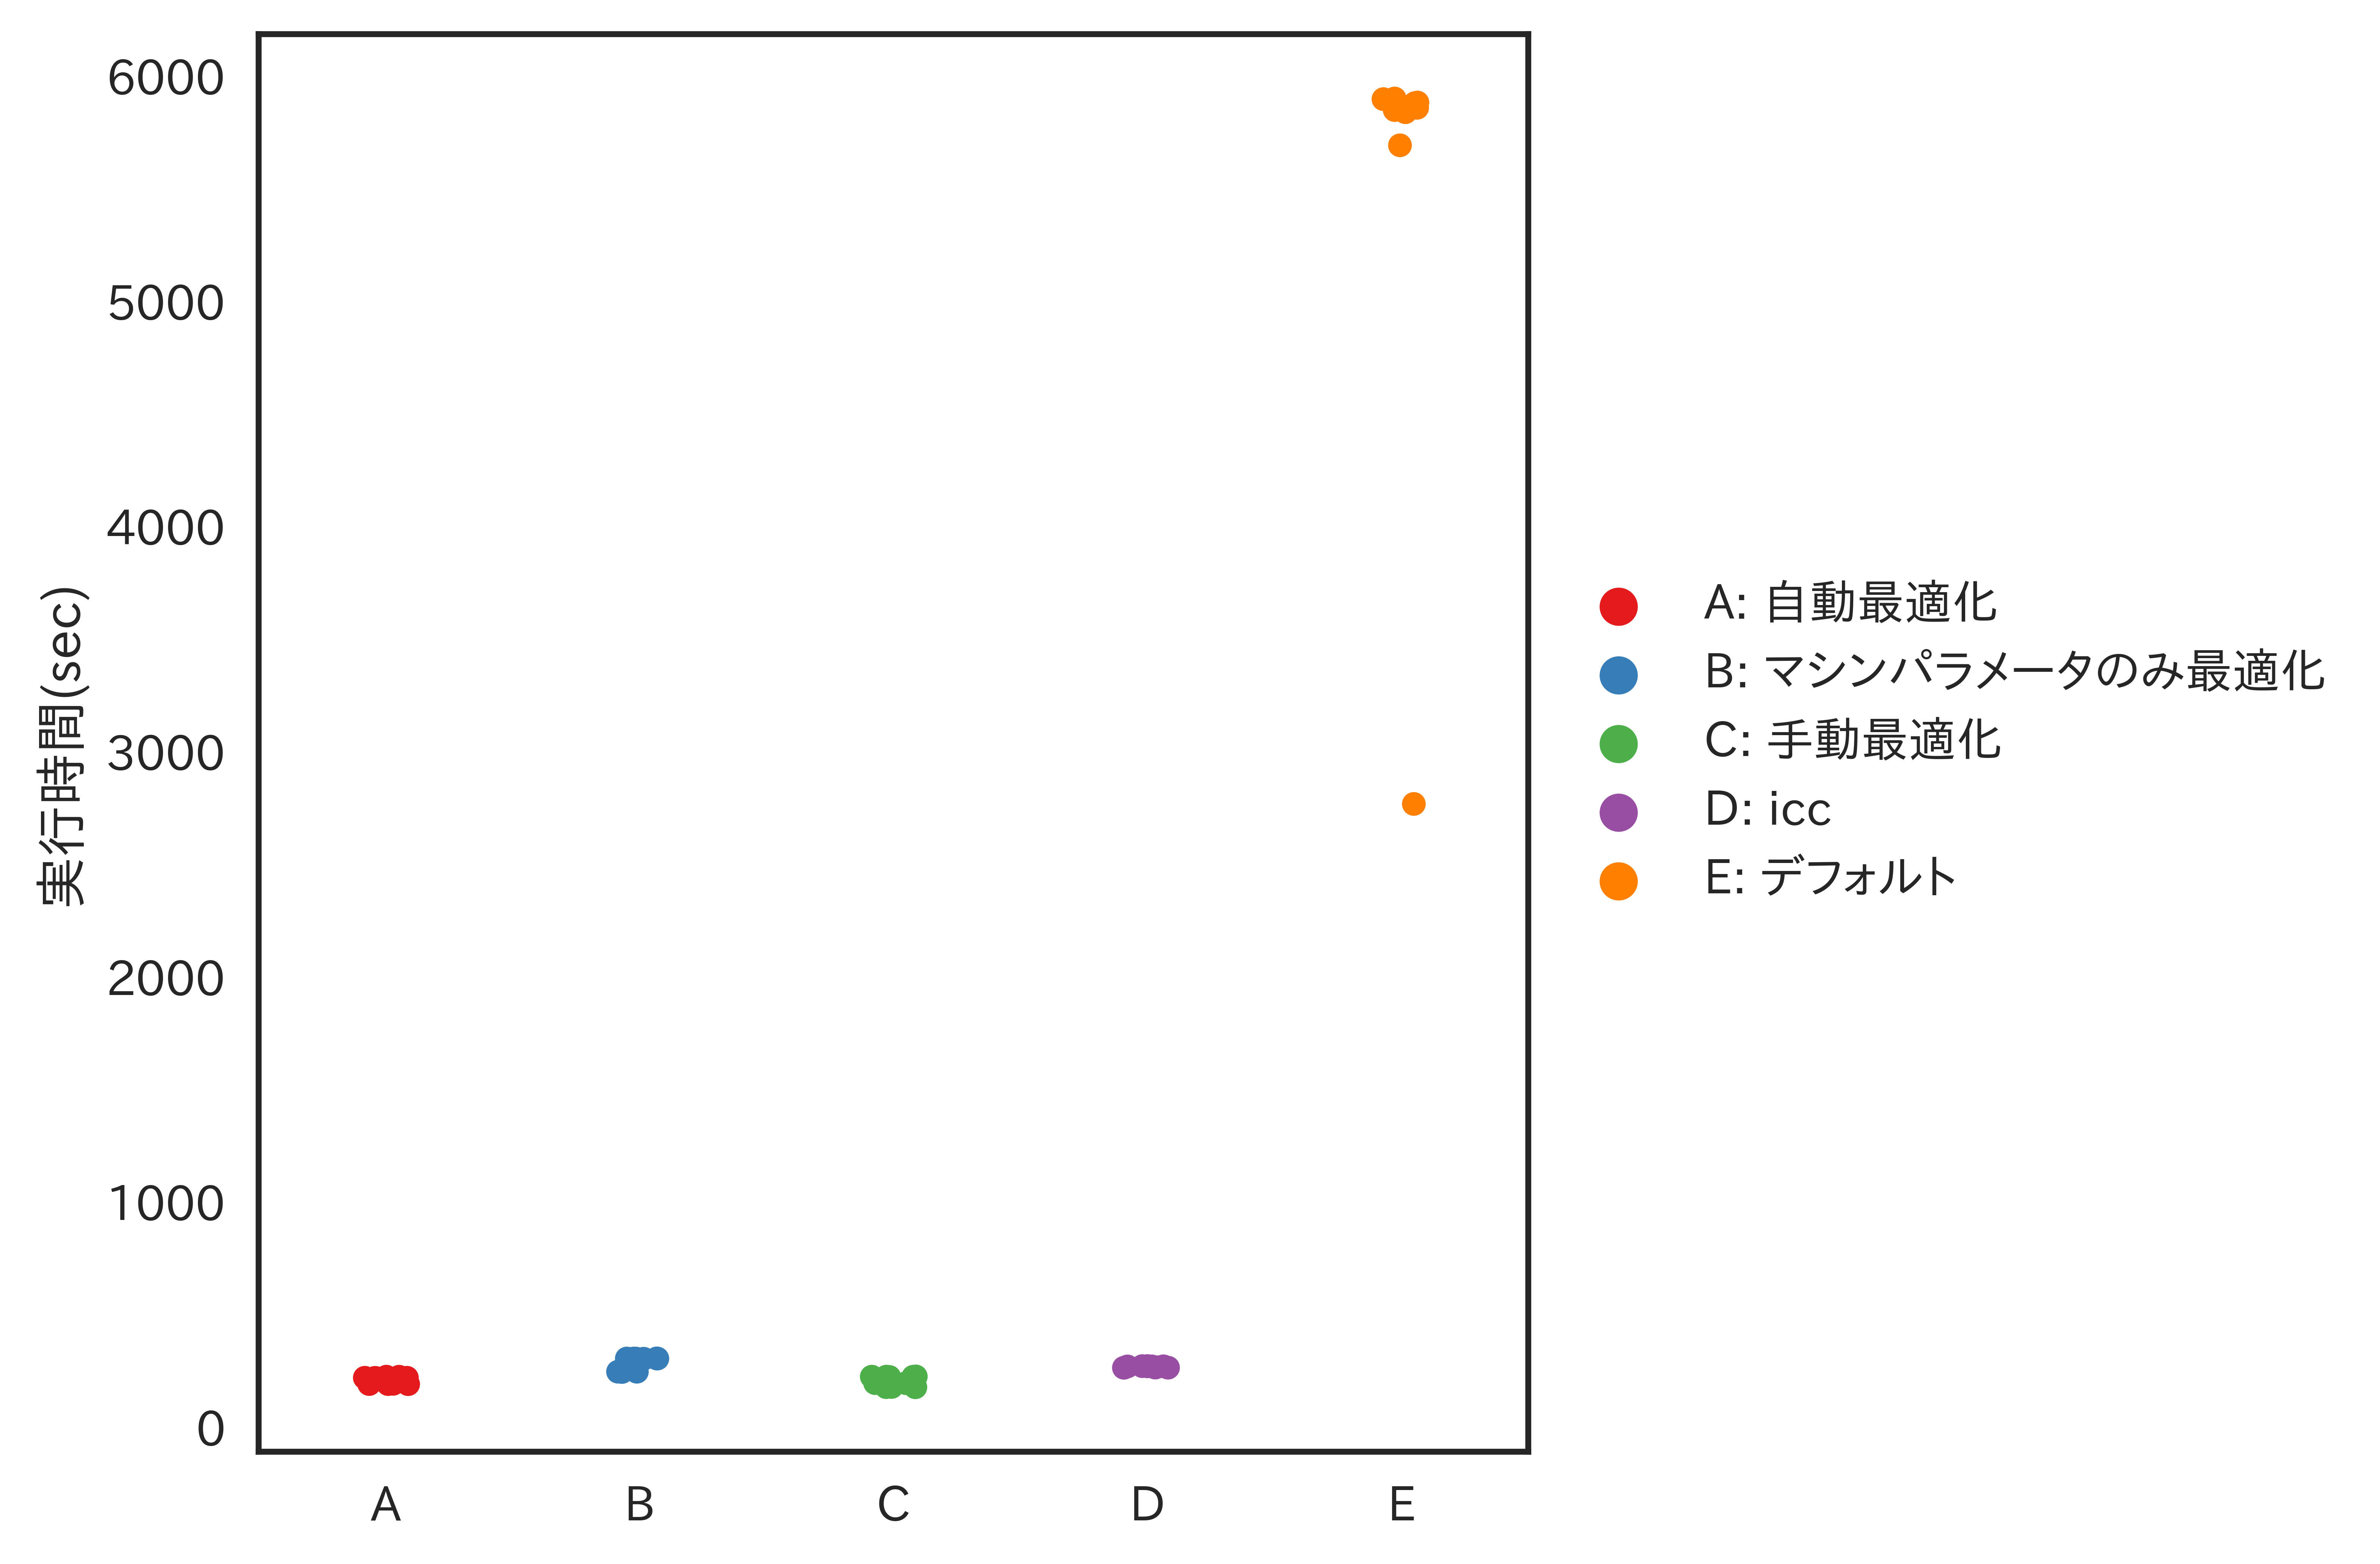

In [229]:
df_cluster = {
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
    "デフォルト": [2769.389279, 5860.954495, 5841.403846, 5860.959548, 5850.891501, 5884.45570, 5882.077237, 5902.260200, 5899.499978, 5694.459678],
}
table = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "デフォルト": "E",
    "icc": "D"
}
d = scatter_med(df_cluster, table, "cluster-compare.pdf")
# boxplot(df_cluster, table, "cluster-compare.png", _range=5.0)

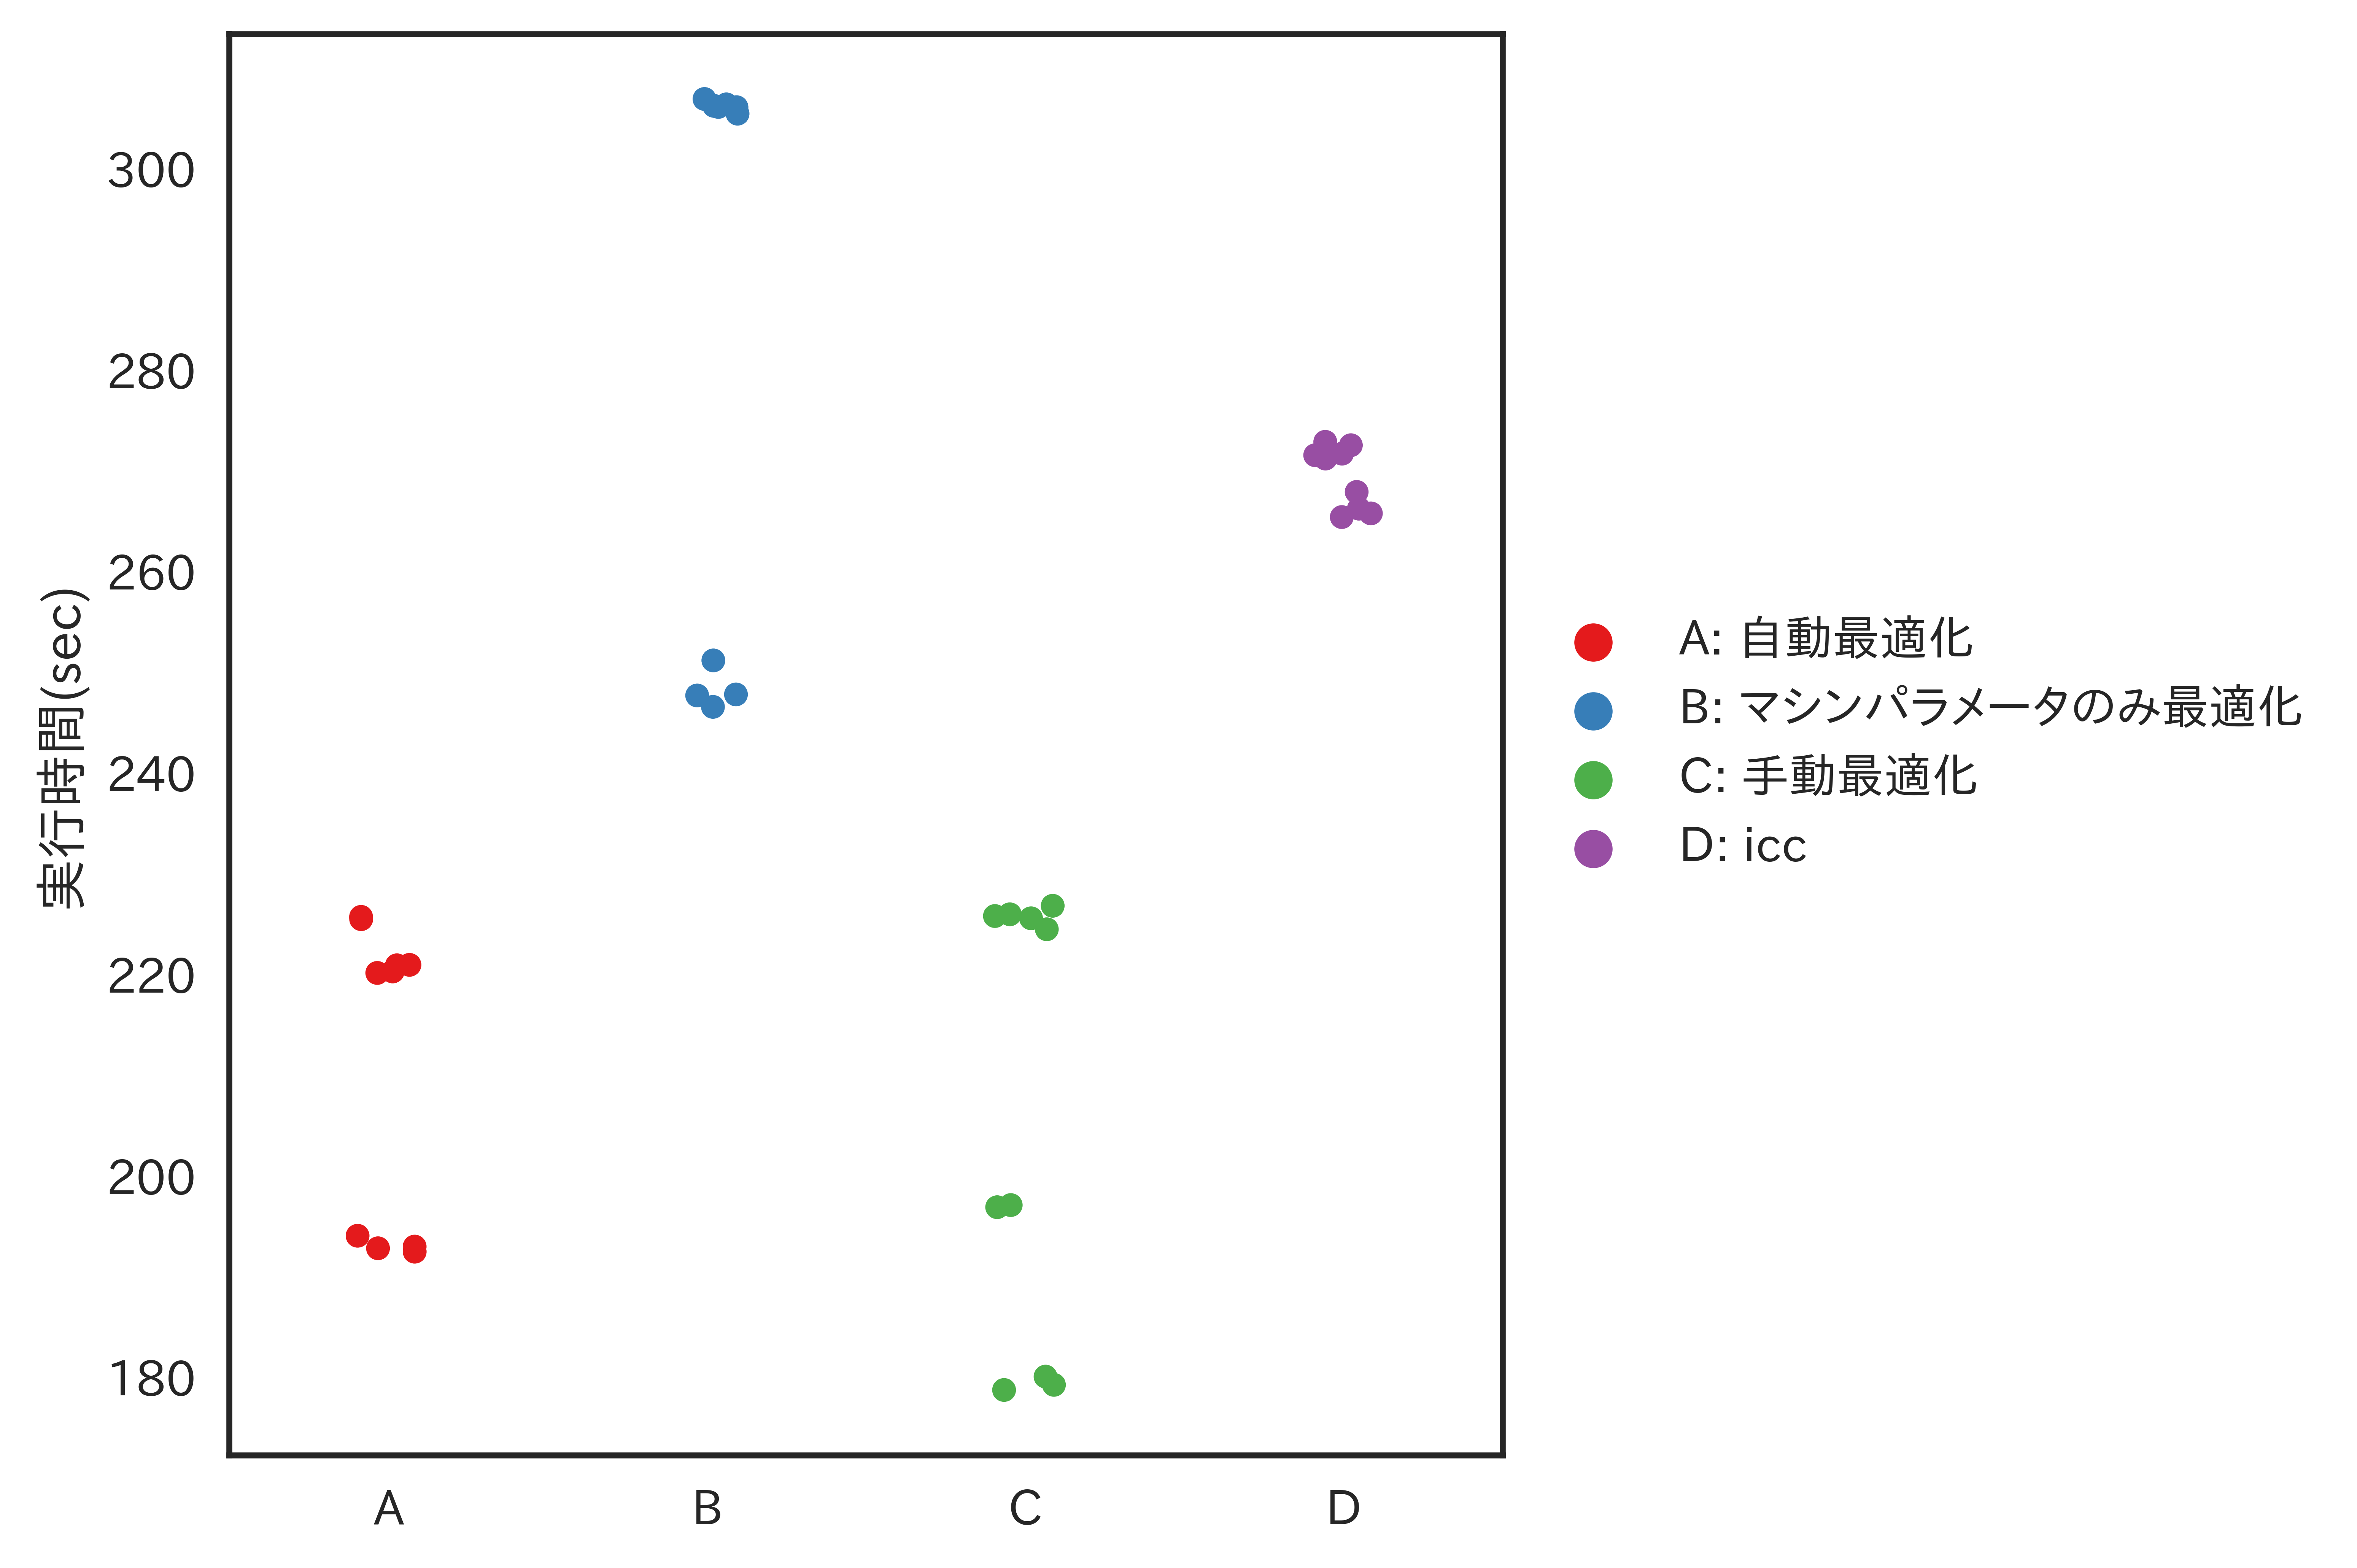

In [230]:
df_cluster2 = {
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
}
table2 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "icc": "D"
}
scatter_med(df_cluster2, table2, "cluster-compare-2.pdf")
# boxplot(df_cluster2, table2, "cluster-compare-2.png")

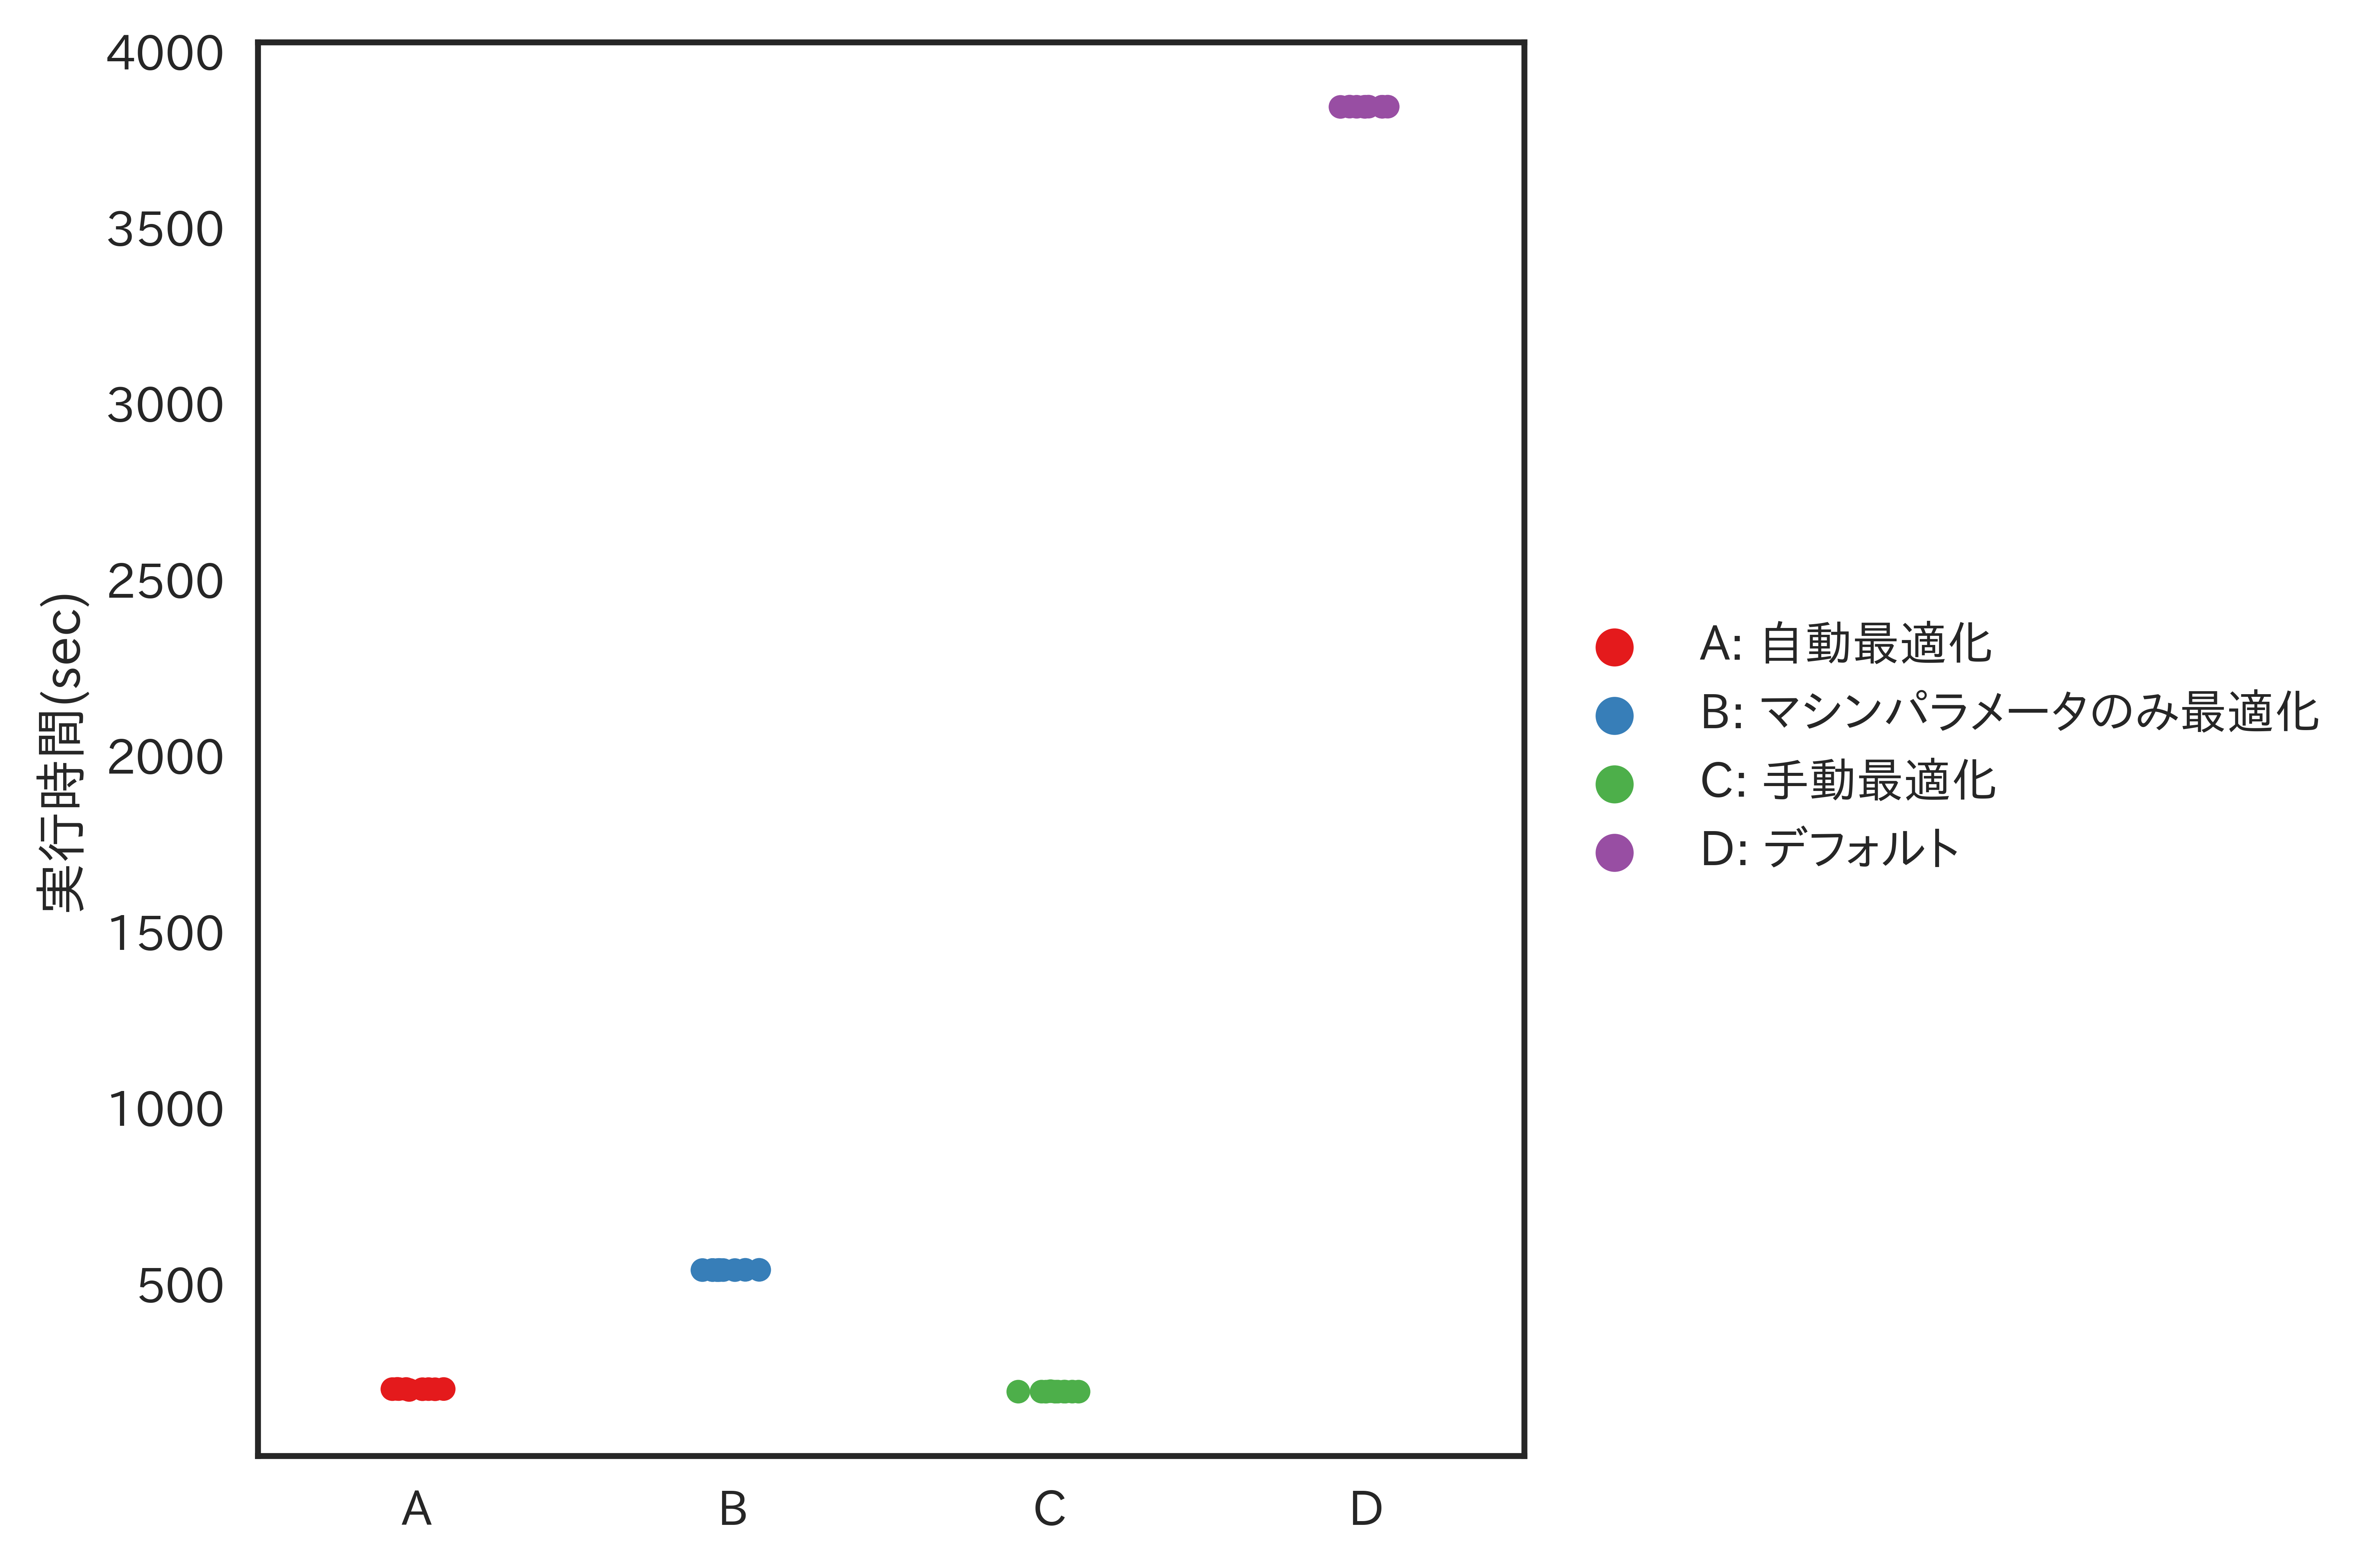

In [231]:
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
    "デフォルト": [3843.444054, 3843.728815, 3843.399342, 3843.391069, 3843.662798, 3843.337617, 3843.606756, 3843.164386, 3842.924506],
}
table3 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "デフォルト": "D",
}
# boxplot(df_k, table3, "k-compare.png")
scatter_med(df_k, table3, "k-compare.pdf")

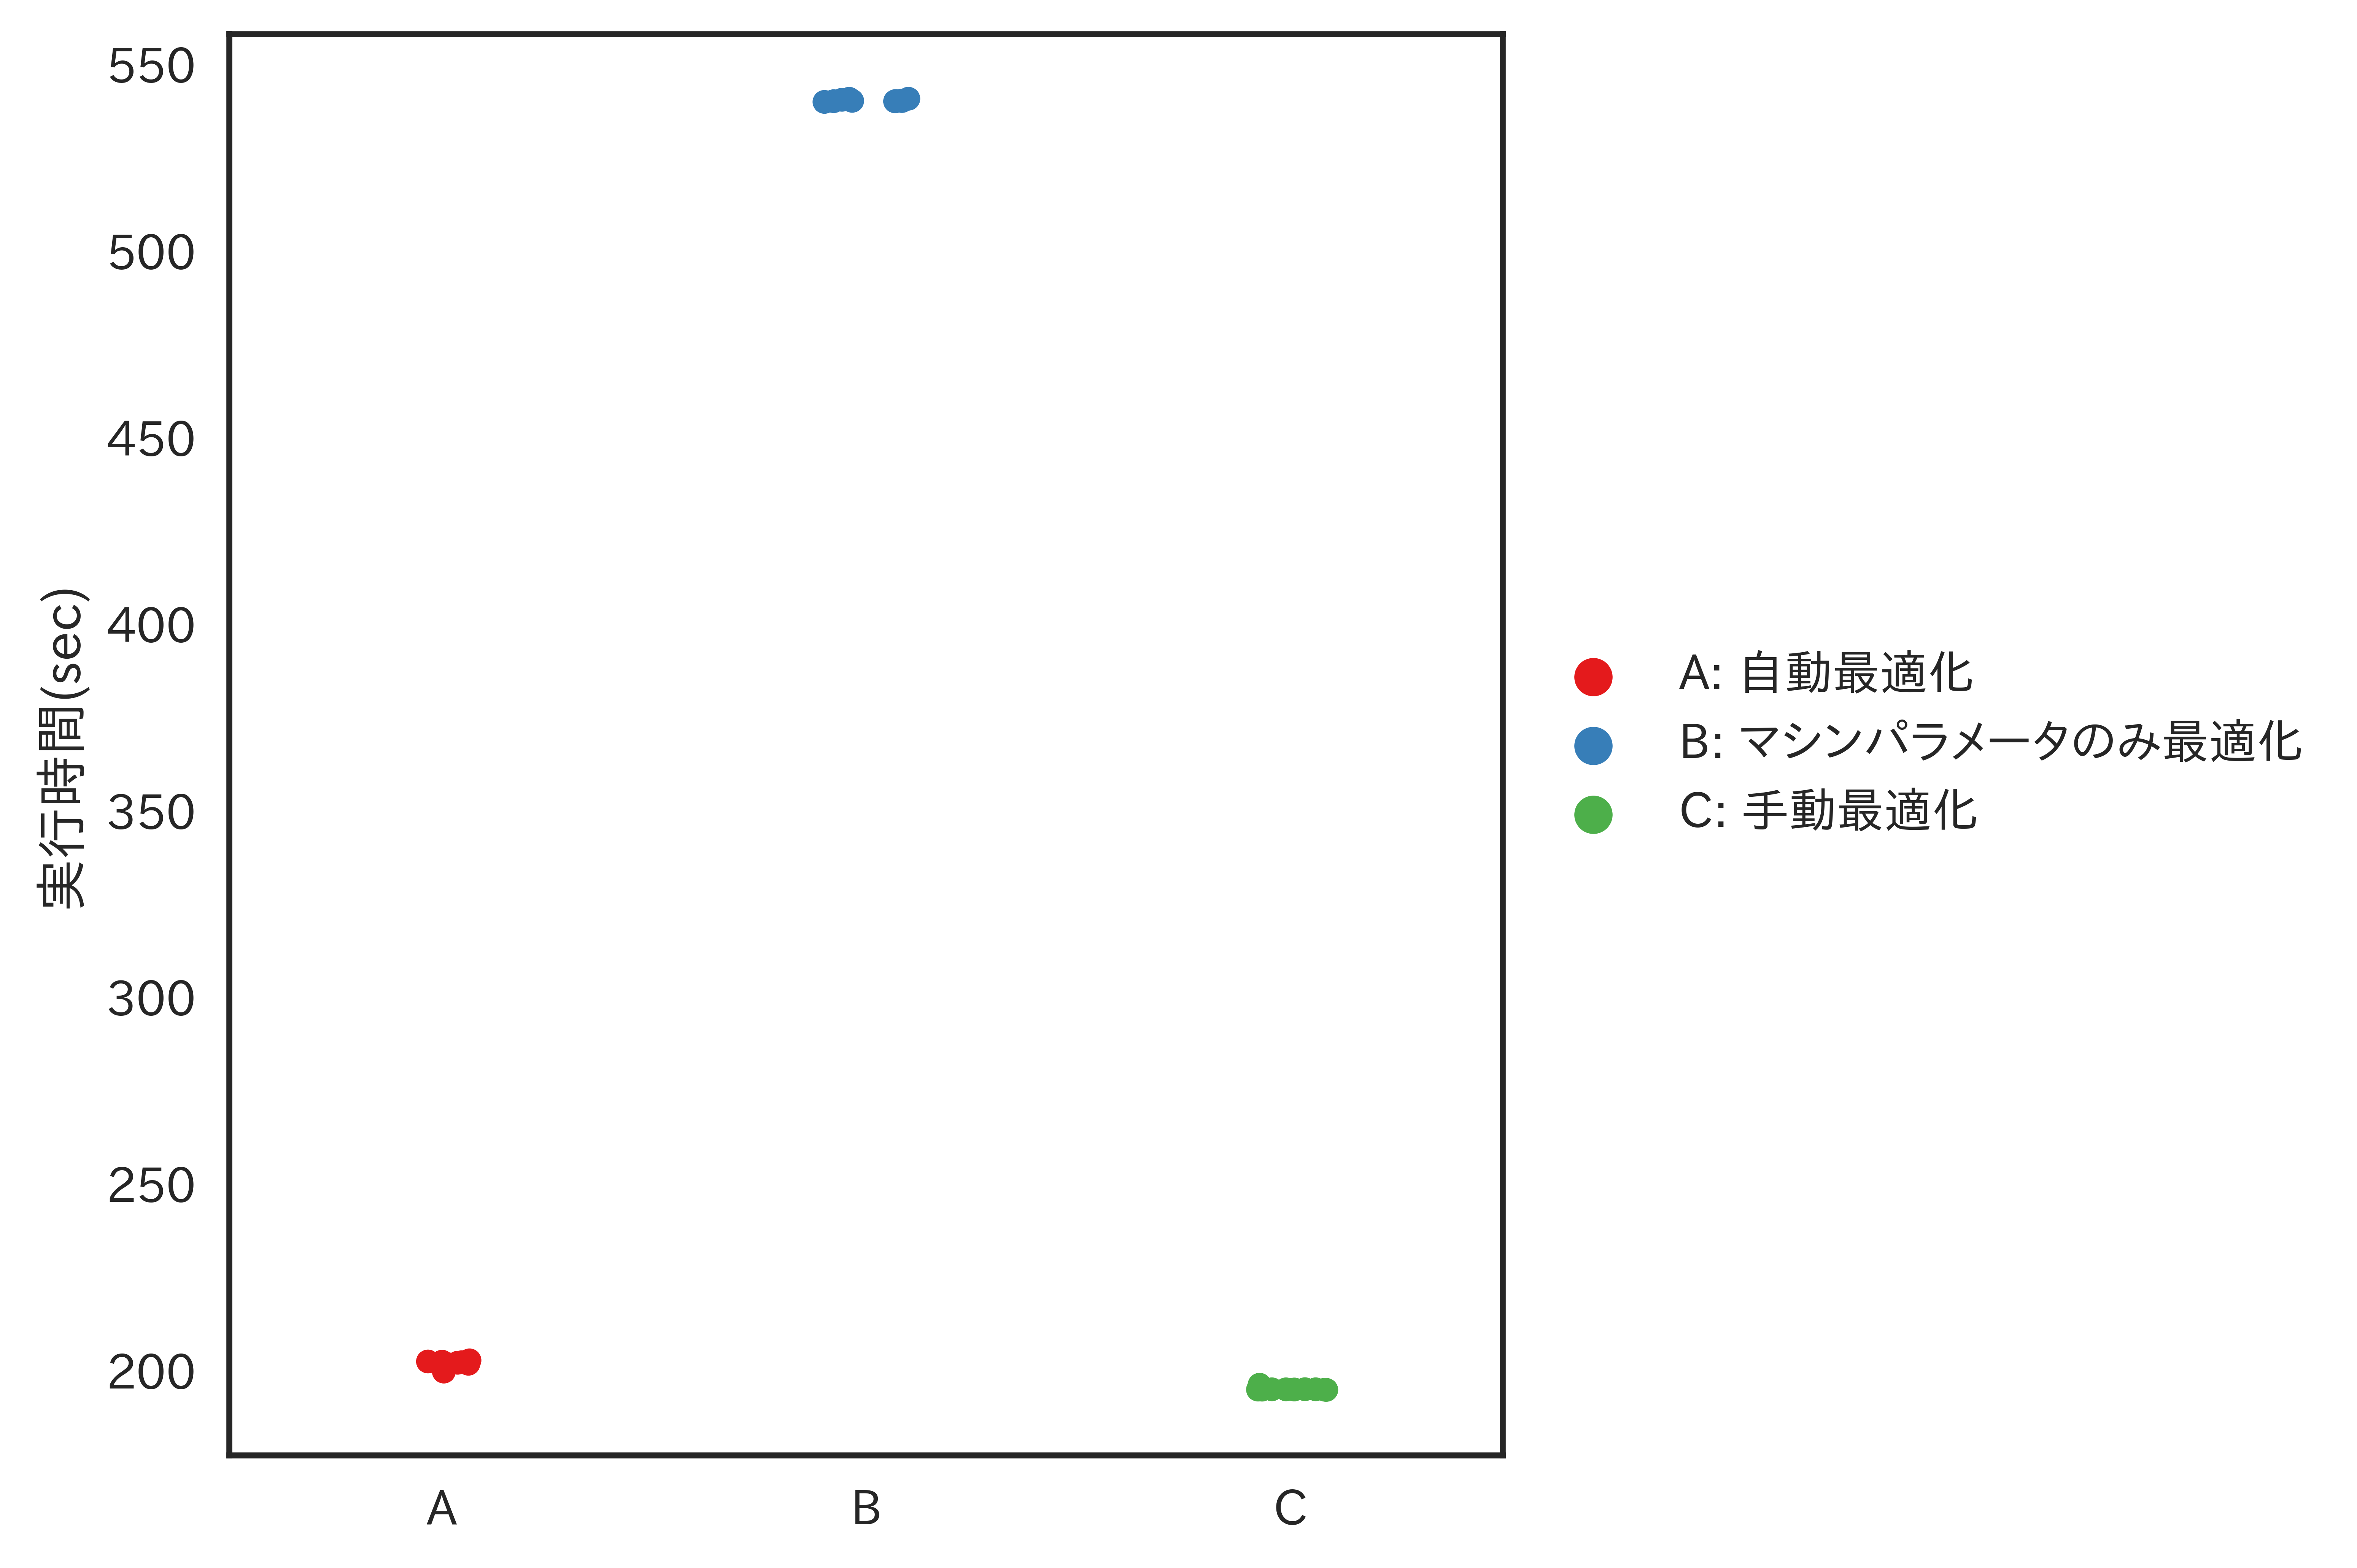

In [232]:
table4 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
scatter_med(df_k, table4, "k-compare-2.pdf")

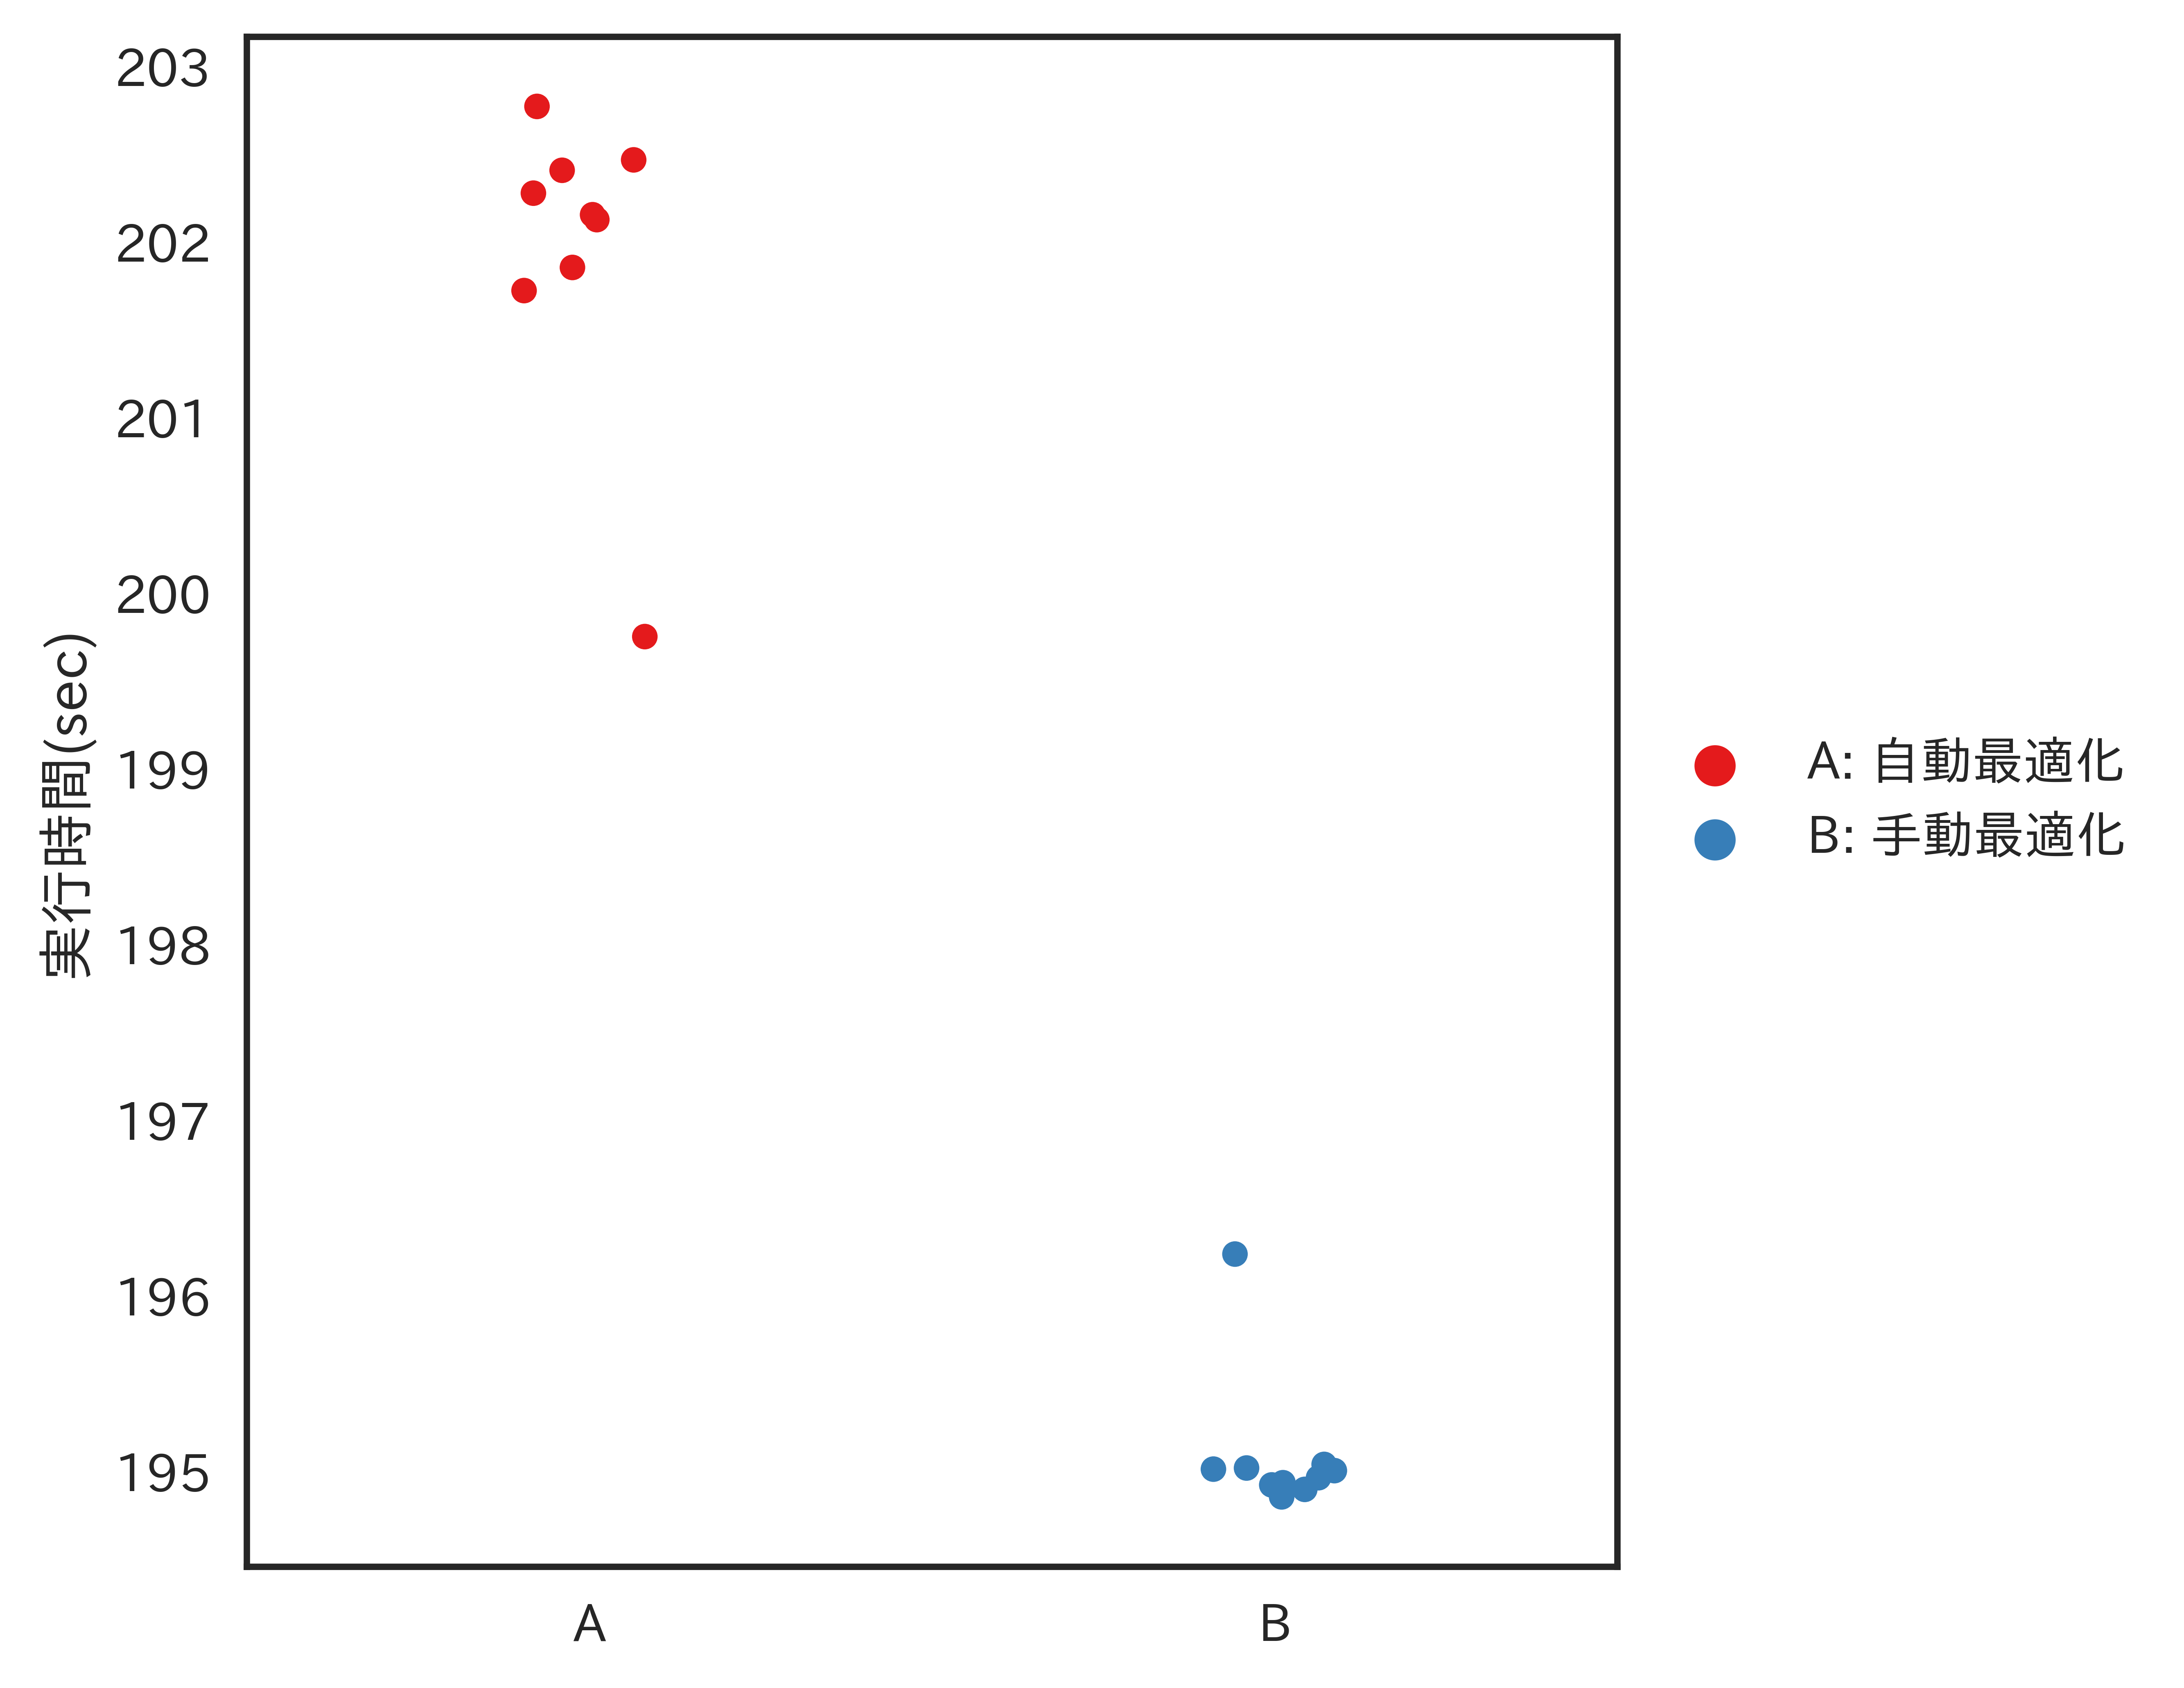

In [233]:
table5 = {
    "自動最適化": "A",
    "手動最適化": "B",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
scatter_med(df_k, table5, "k-compare-3.pdf")

range
Label property of box 0 is A
Label property of box 1 is B
Label property of box 2 is C
Label property of box 3 is D


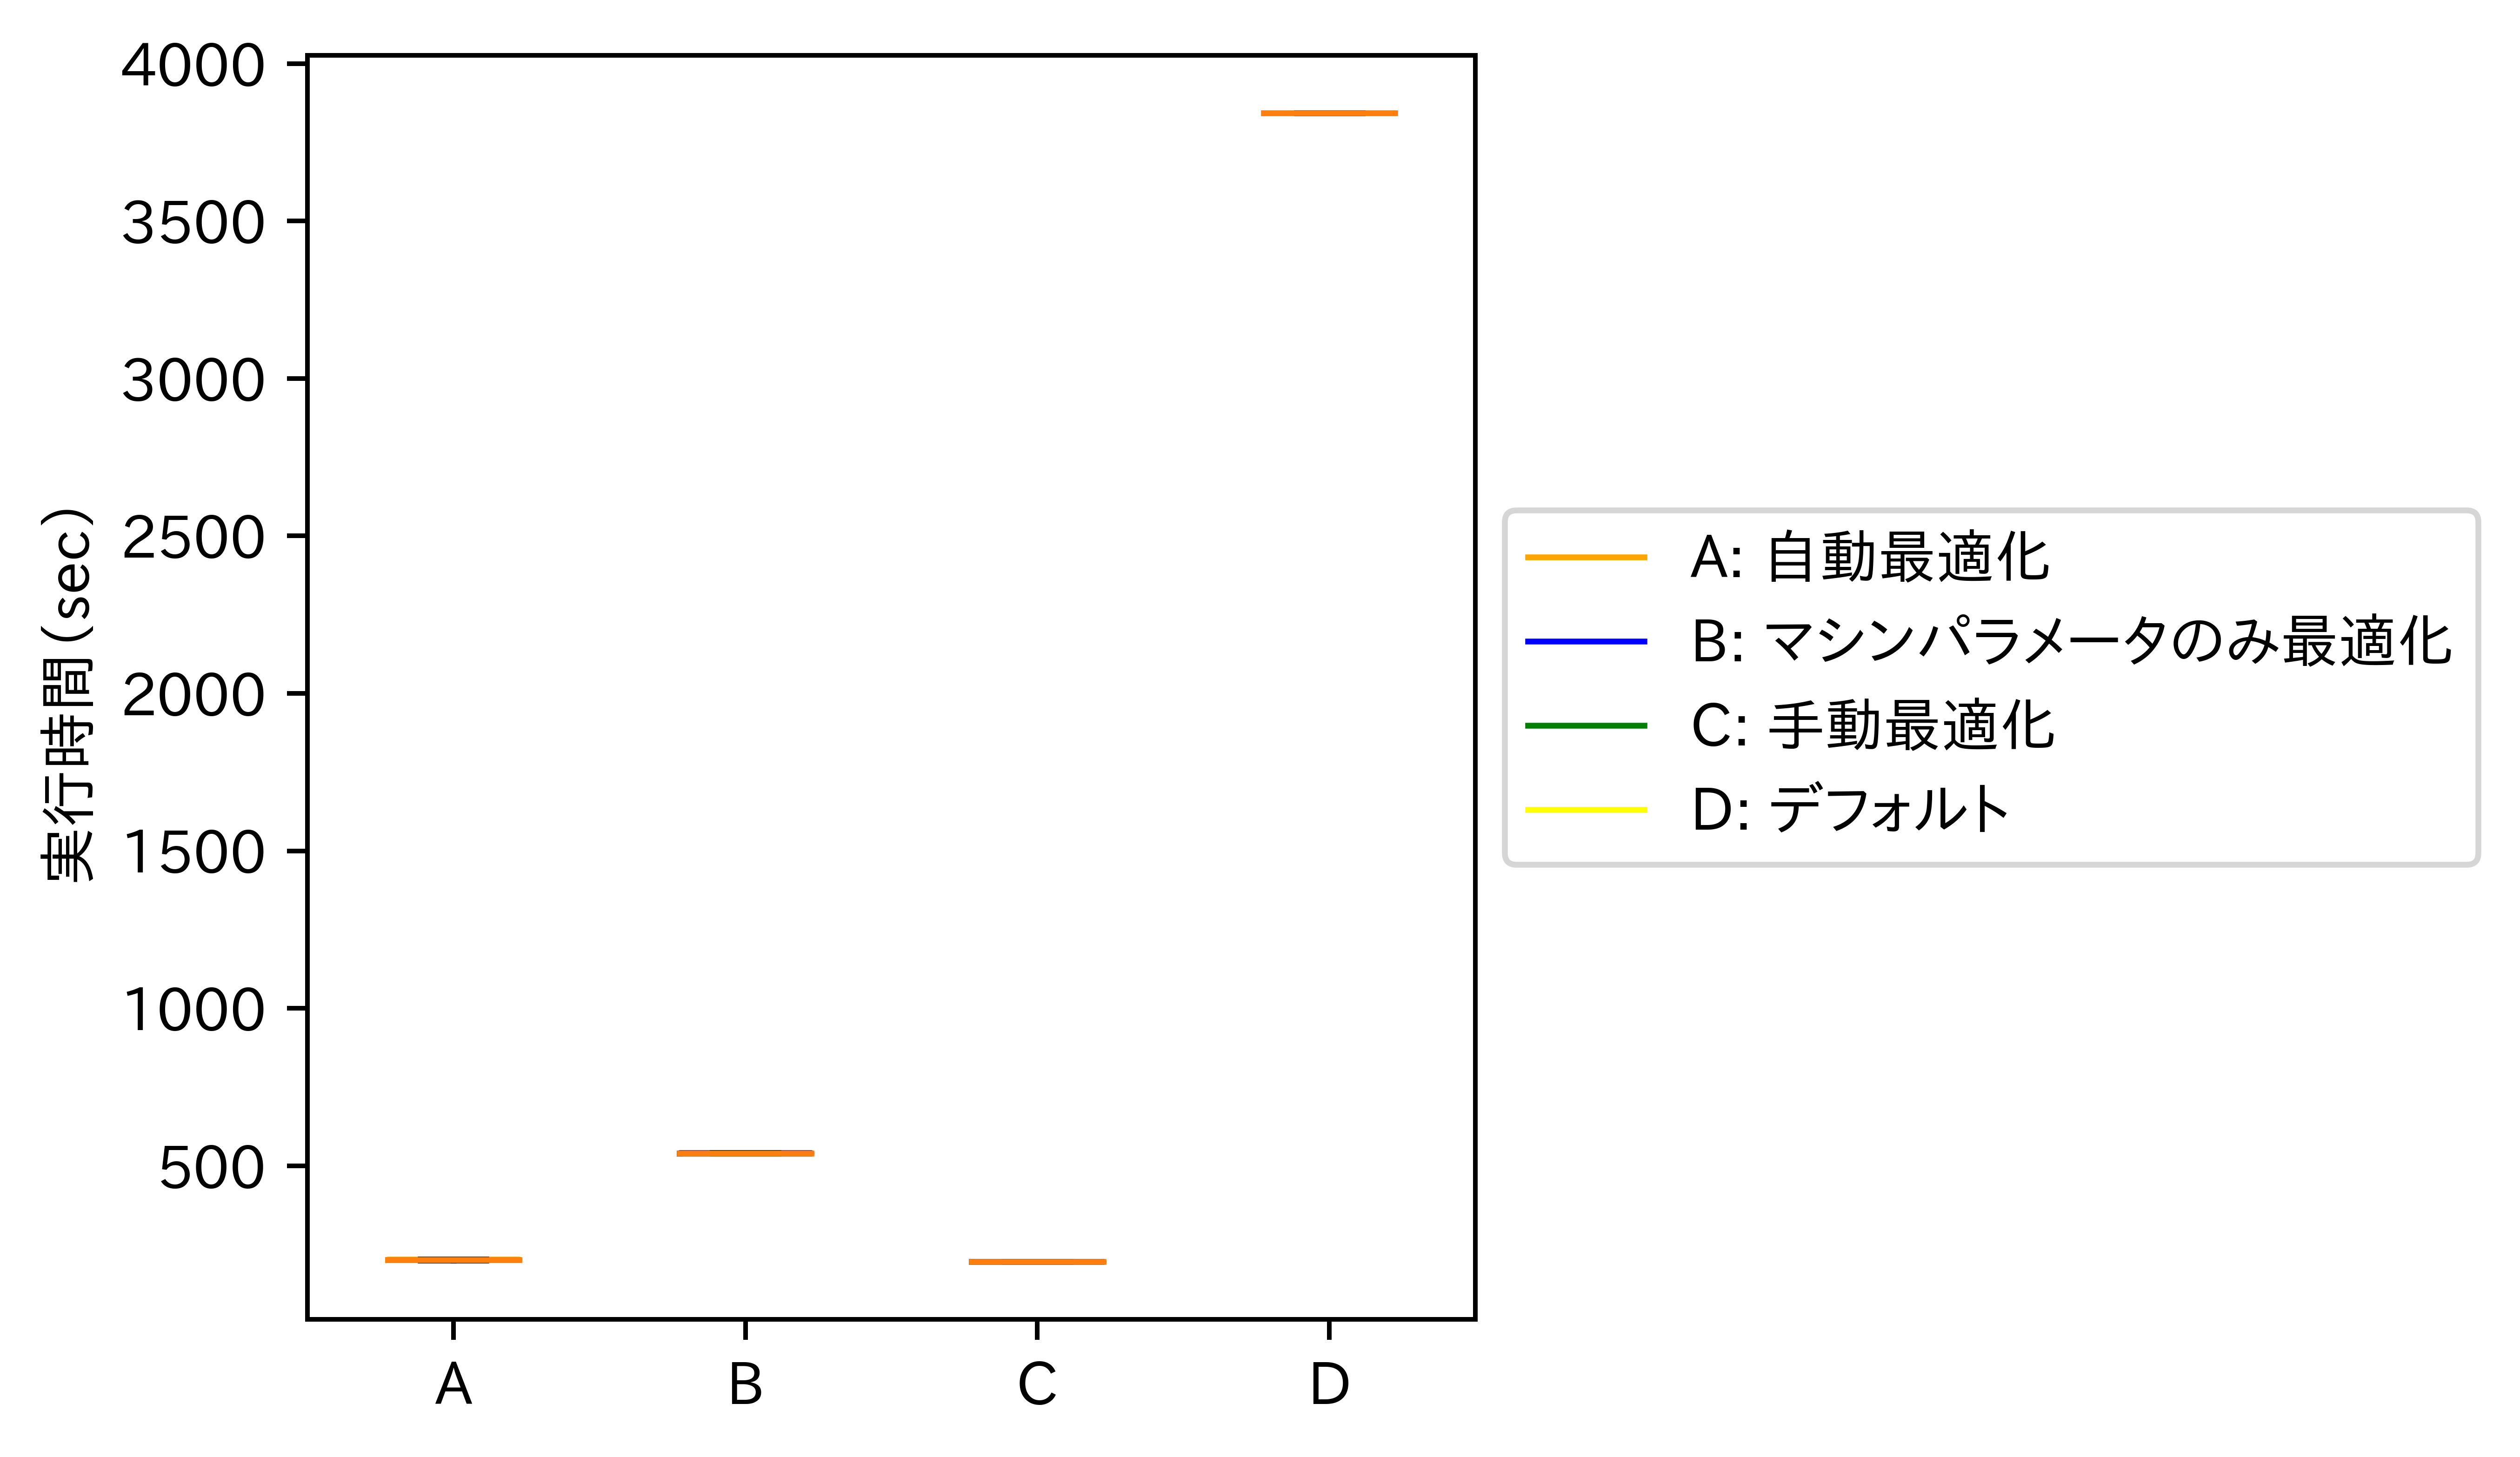

range
Label property of box 0 is A
Label property of box 1 is B
Label property of box 2 is C


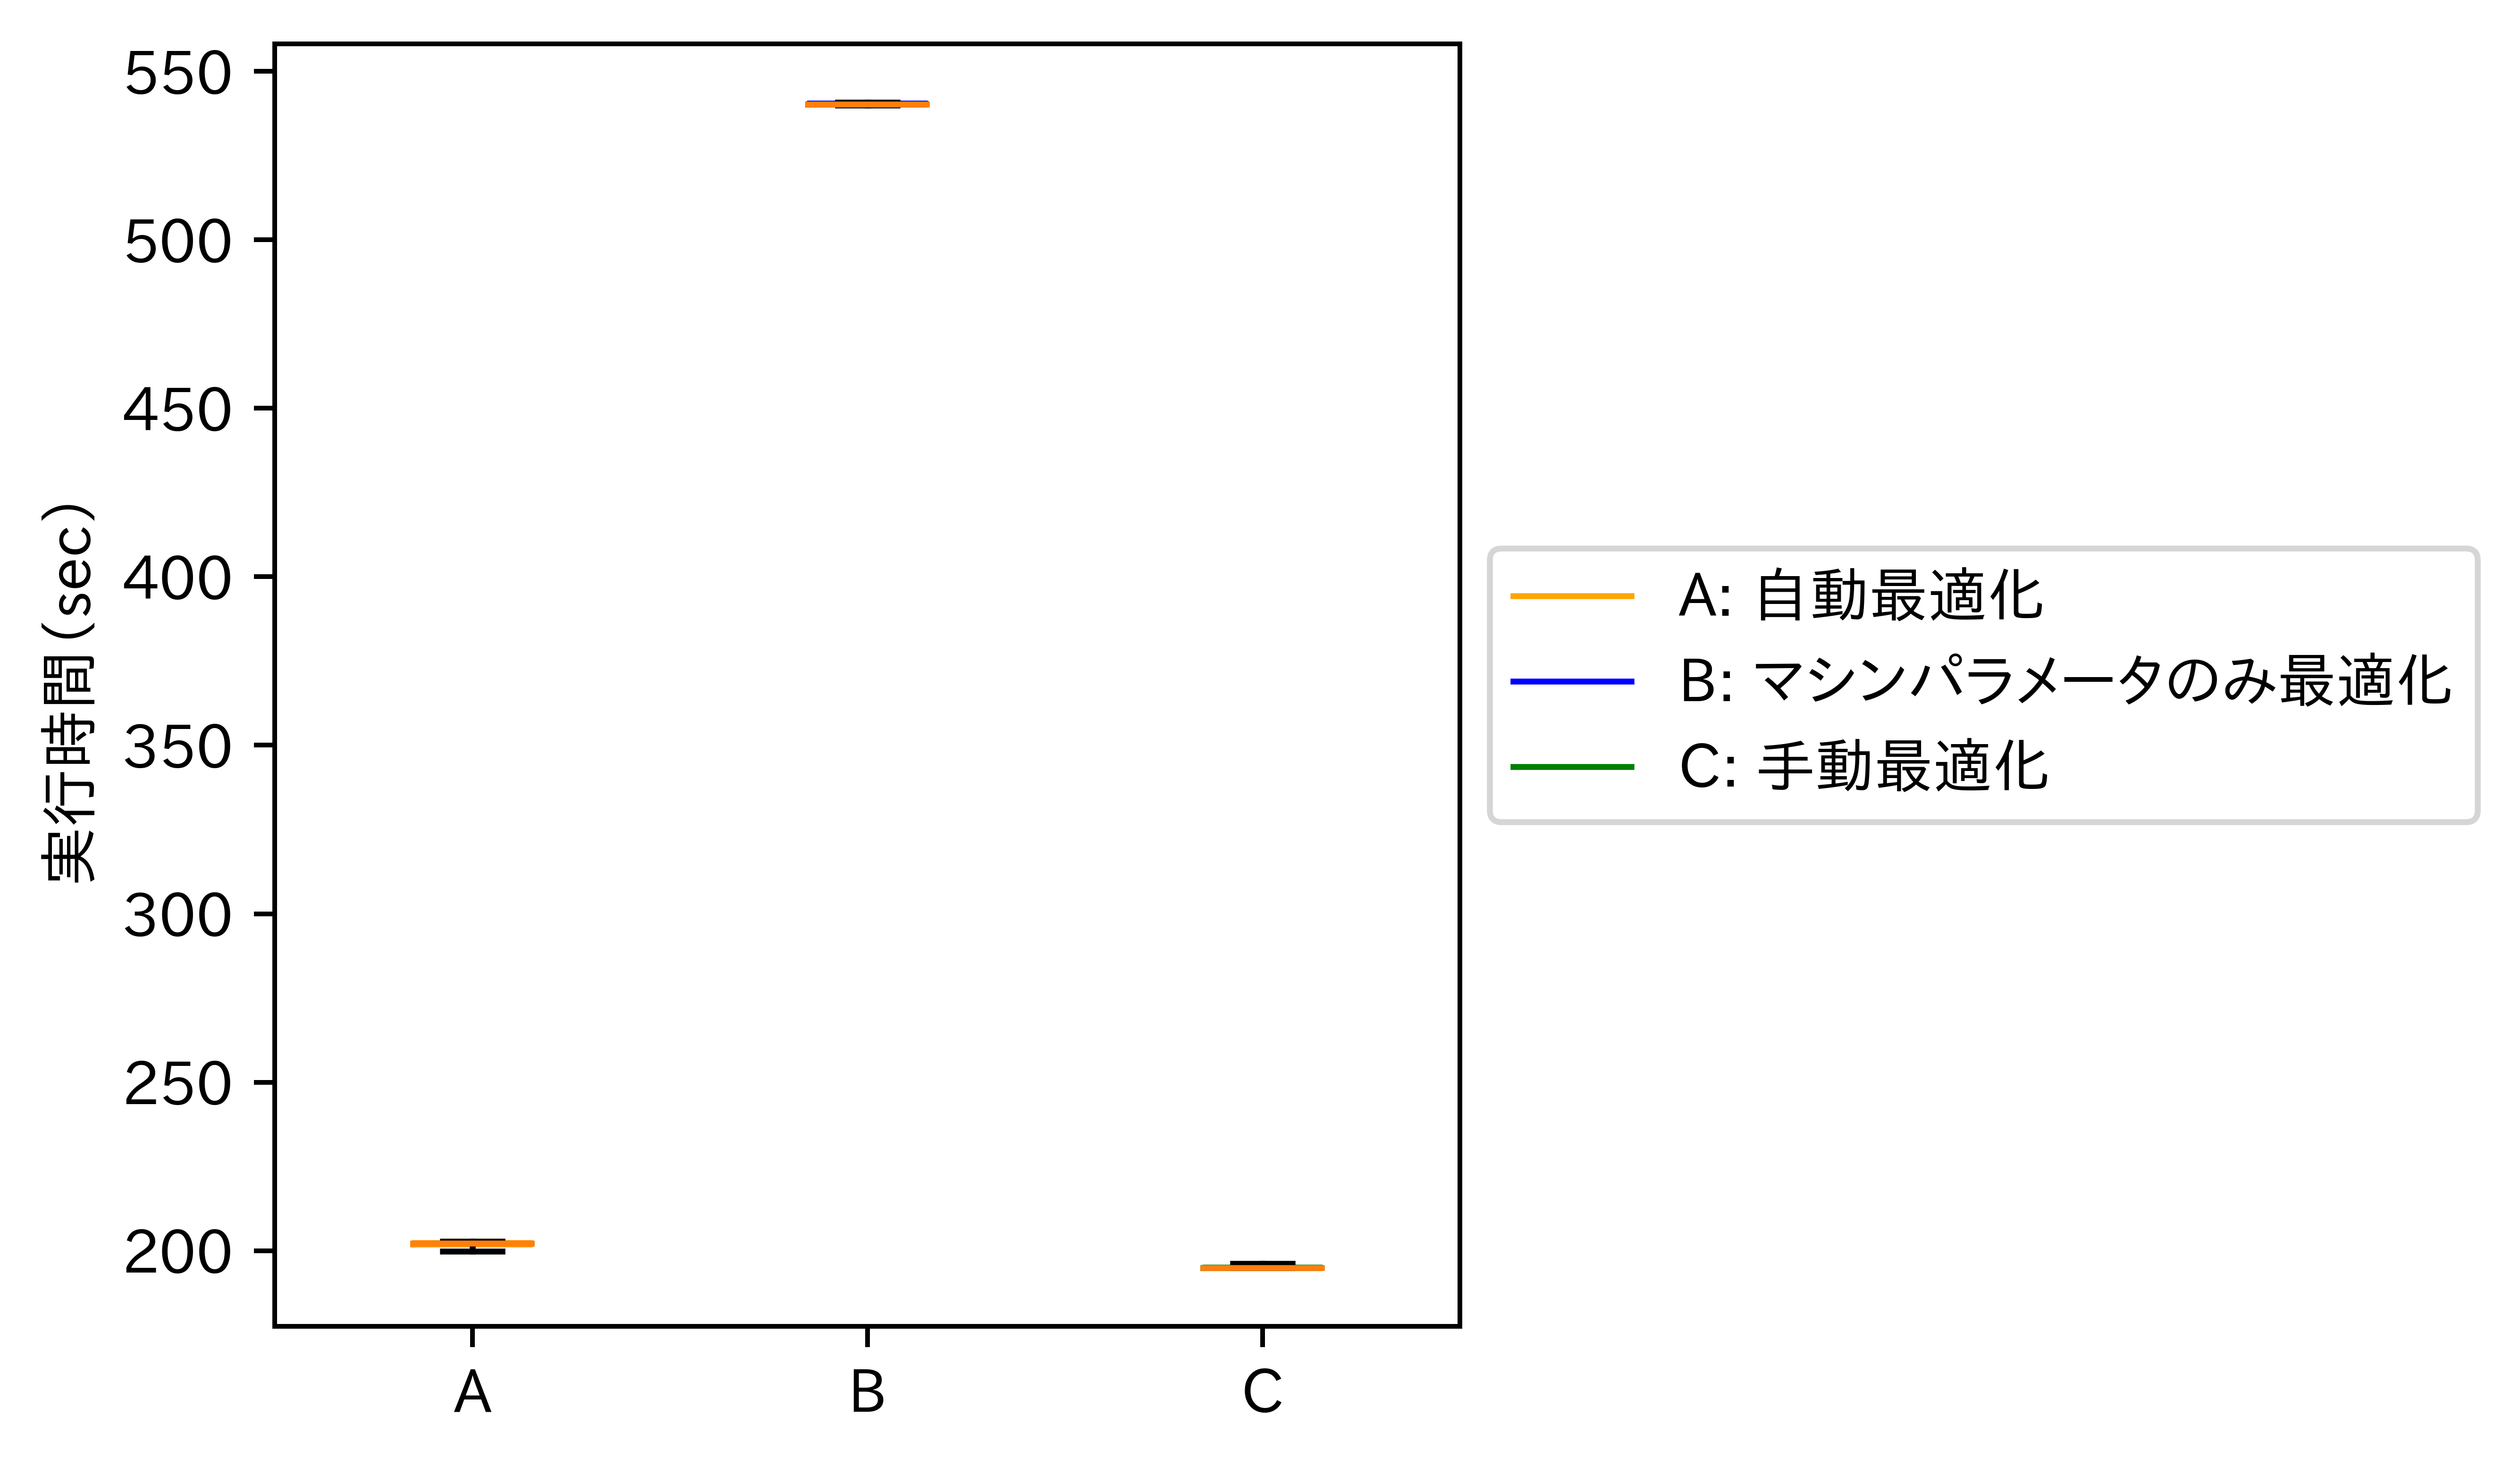

range
Label property of box 0 is A
Label property of box 1 is B


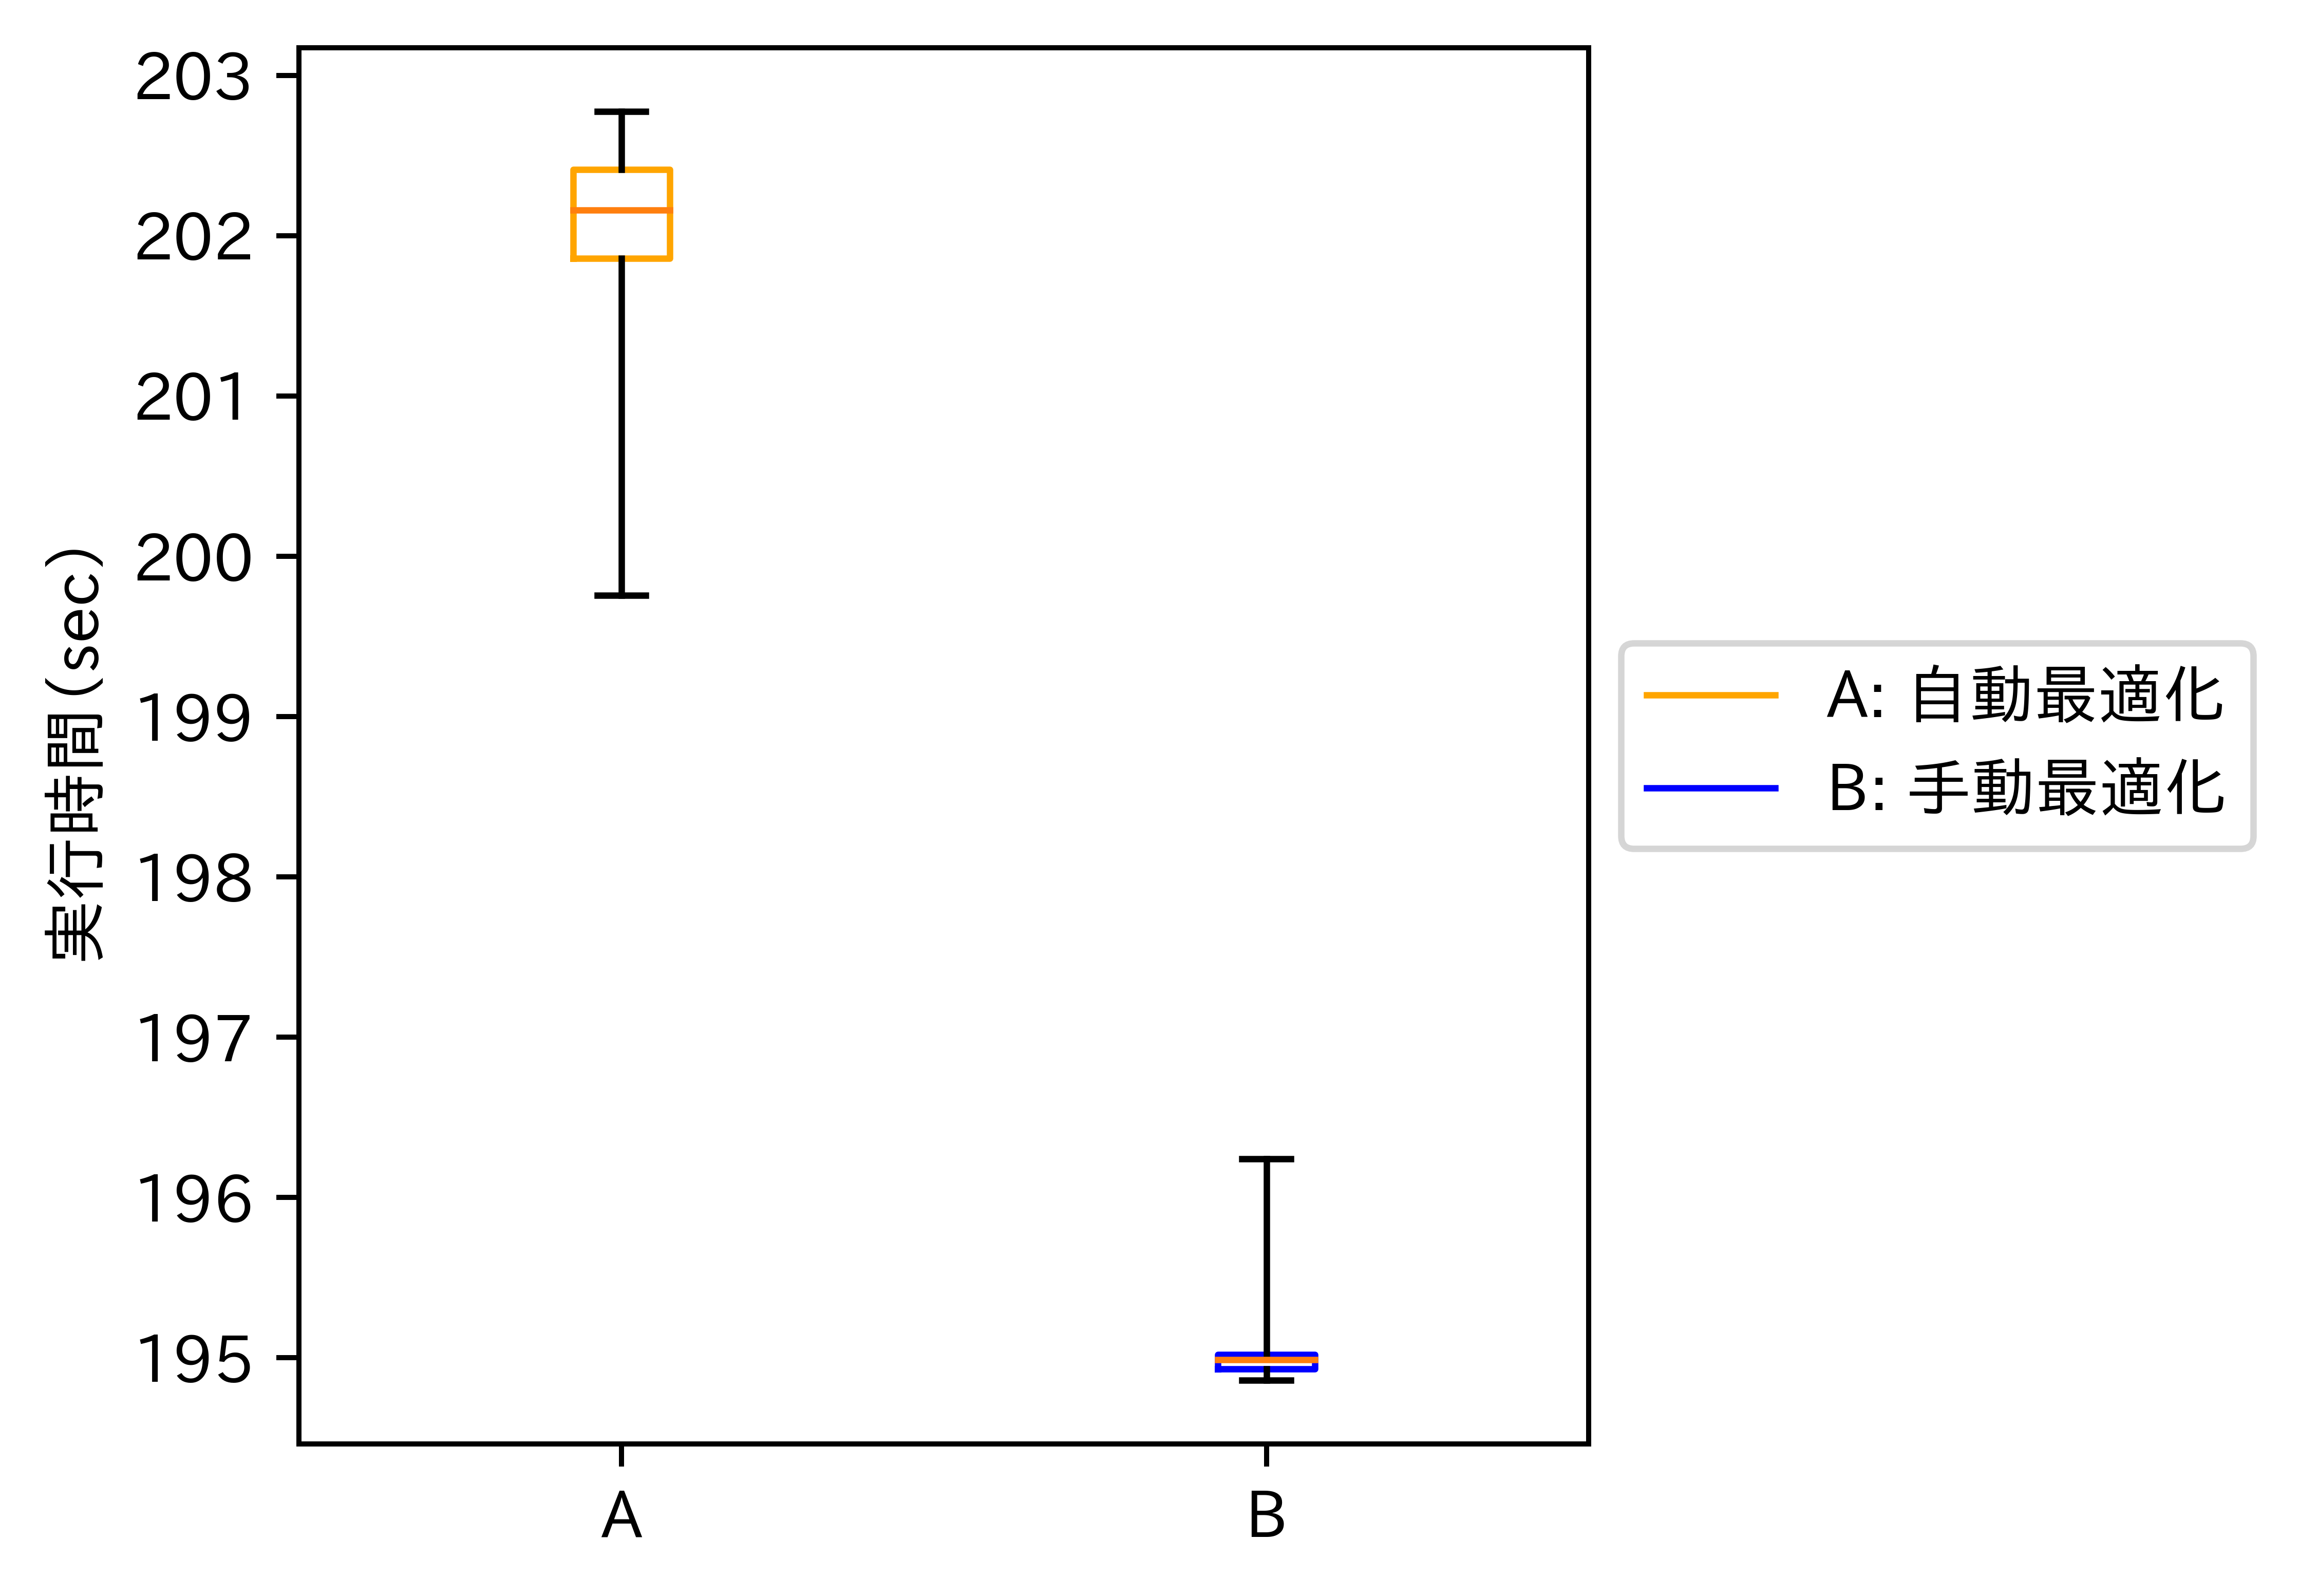

In [4]:
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
    "デフォルト": [3843.444054, 3843.728815, 3843.399342, 3843.391069, 3843.662798, 3843.337617, 3843.606756, 3843.164386, 3842.924506],
}
table3 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "デフォルト": "D",
}
boxplot(df_k, table3, "k-compare.png")

table4 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
boxplot(df_k, table4, "k-compare-2.png")

table5 = {
    "自動最適化": "A",
    "手動最適化": "B",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
boxplot(df_k, table5, "k-compare-3.png")

In [15]:
def boxplot2(data1, data2, table, filename, _range='range'):
    d1 = []
    label1 = []
    d2 = []
    label2 = []
    for k in data1:
        d1.append(data1[k])
        label1.append(table[k])
    for k in data2:
        d2.append(data2[k])
        label2.append(table[k])

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=900)
    boxplot_dict1 = axes[0].boxplot(d1, whis=_range)
    boxplot_dict2 = axes[1].boxplot(d2, whis=_range)
    axes[0].set_xticklabels(label1)
    axes[1].set_xticklabels(label2)
    
    color_dict = {'A':'orange', 'B':'blue', 'C':'green', 'D': 'yellow', 'E': 'RED', 'X': 'black'}
    i=0
    label = []
    for b in boxplot_dict1['boxes']:
        lab = axes[0].get_xticklabels()[i].get_text()
        print("Label property of box {0} is {1}".format(i, lab))
        b.set_color(color_dict[lab])
        for k in data1:
            if table[k] == lab:
                b.set_label("{0}: {1}".format(lab, k))
                label.append("{0}: {1}".format(lab, k))
        i += 1
    i = 0
    for b in boxplot_dict2['boxes']:
        lab = axes[1].get_xticklabels()[i].get_text()
        print("Label property of box {0} is {1}".format(i, lab))
        b.set_color(color_dict[lab])
        for k in data2:
            if table[k] == lab:
                b.set_label("{0}: {1}".format(lab, k))
        i += 1
    axes[0].set_ylabel("実行時間（sec）")
    axes[0].set_title("クラスタ", fontsize=18)
    axes[1].set_title("京", fontsize=18)
#     axes[1].set_ylabel("実行時間（sec）")
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    fig.legend(tuple(boxplot_dict1['boxes']), label, 'center right', borderaxespad=0.05, fontsize=10)
    plt.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

In [ ]:
def jitter_scatter2(data1, data2, table, filename, _range='range'):
    d1 = []
    label1 = []
    d2 = []
    label2 = []
    for k in data1:
        d1.append(data1[k])
        label1.append(table[k])
    for k in data2:
        d2.append(data2[k])
        label2.append(table[k])

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=900)
    boxplot_dict1 = axes[0].boxplot(d1, whis=_range)
    boxplot_dict2 = axes[1].boxplot(d2, whis=_range)
    axes[0].set_xticklabels(label1)
    axes[1].set_xticklabels(label2)
    
    color_dict = {'A':'orange', 'B':'blue', 'C':'green', 'D': 'yellow', 'E': 'RED', 'X': 'black'}
    i=0
    label = []
    for b in boxplot_dict1['boxes']:
        lab = axes[0].get_xticklabels()[i].get_text()
        print("Label property of box {0} is {1}".format(i, lab))
        b.set_color(color_dict[lab])
        for k in data1:
            if table[k] == lab:
                b.set_label("{0}: {1}".format(lab, k))
                label.append("{0}: {1}".format(lab, k))
        i += 1
    i = 0
    for b in boxplot_dict2['boxes']:
        lab = axes[1].get_xticklabels()[i].get_text()
        print("Label property of box {0} is {1}".format(i, lab))
        b.set_color(color_dict[lab])
        for k in data2:
            if table[k] == lab:
                b.set_label("{0}: {1}".format(lab, k))
        i += 1
    axes[0].set_ylabel("実行時間（sec）")
    axes[0].set_title("クラスタ", fontsize=18)
    axes[1].set_title("京", fontsize=18)
#     axes[1].set_ylabel("実行時間（sec）")
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    fig.legend(tuple(boxplot_dict1['boxes']), label, 'center right', borderaxespad=0.05, fontsize=10)
    plt.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

Label property of box 0 is X
Label property of box 1 is A
Label property of box 2 is B
Label property of box 3 is C
Label property of box 4 is D
Label property of box 0 is A
Label property of box 1 is B
Label property of box 2 is C


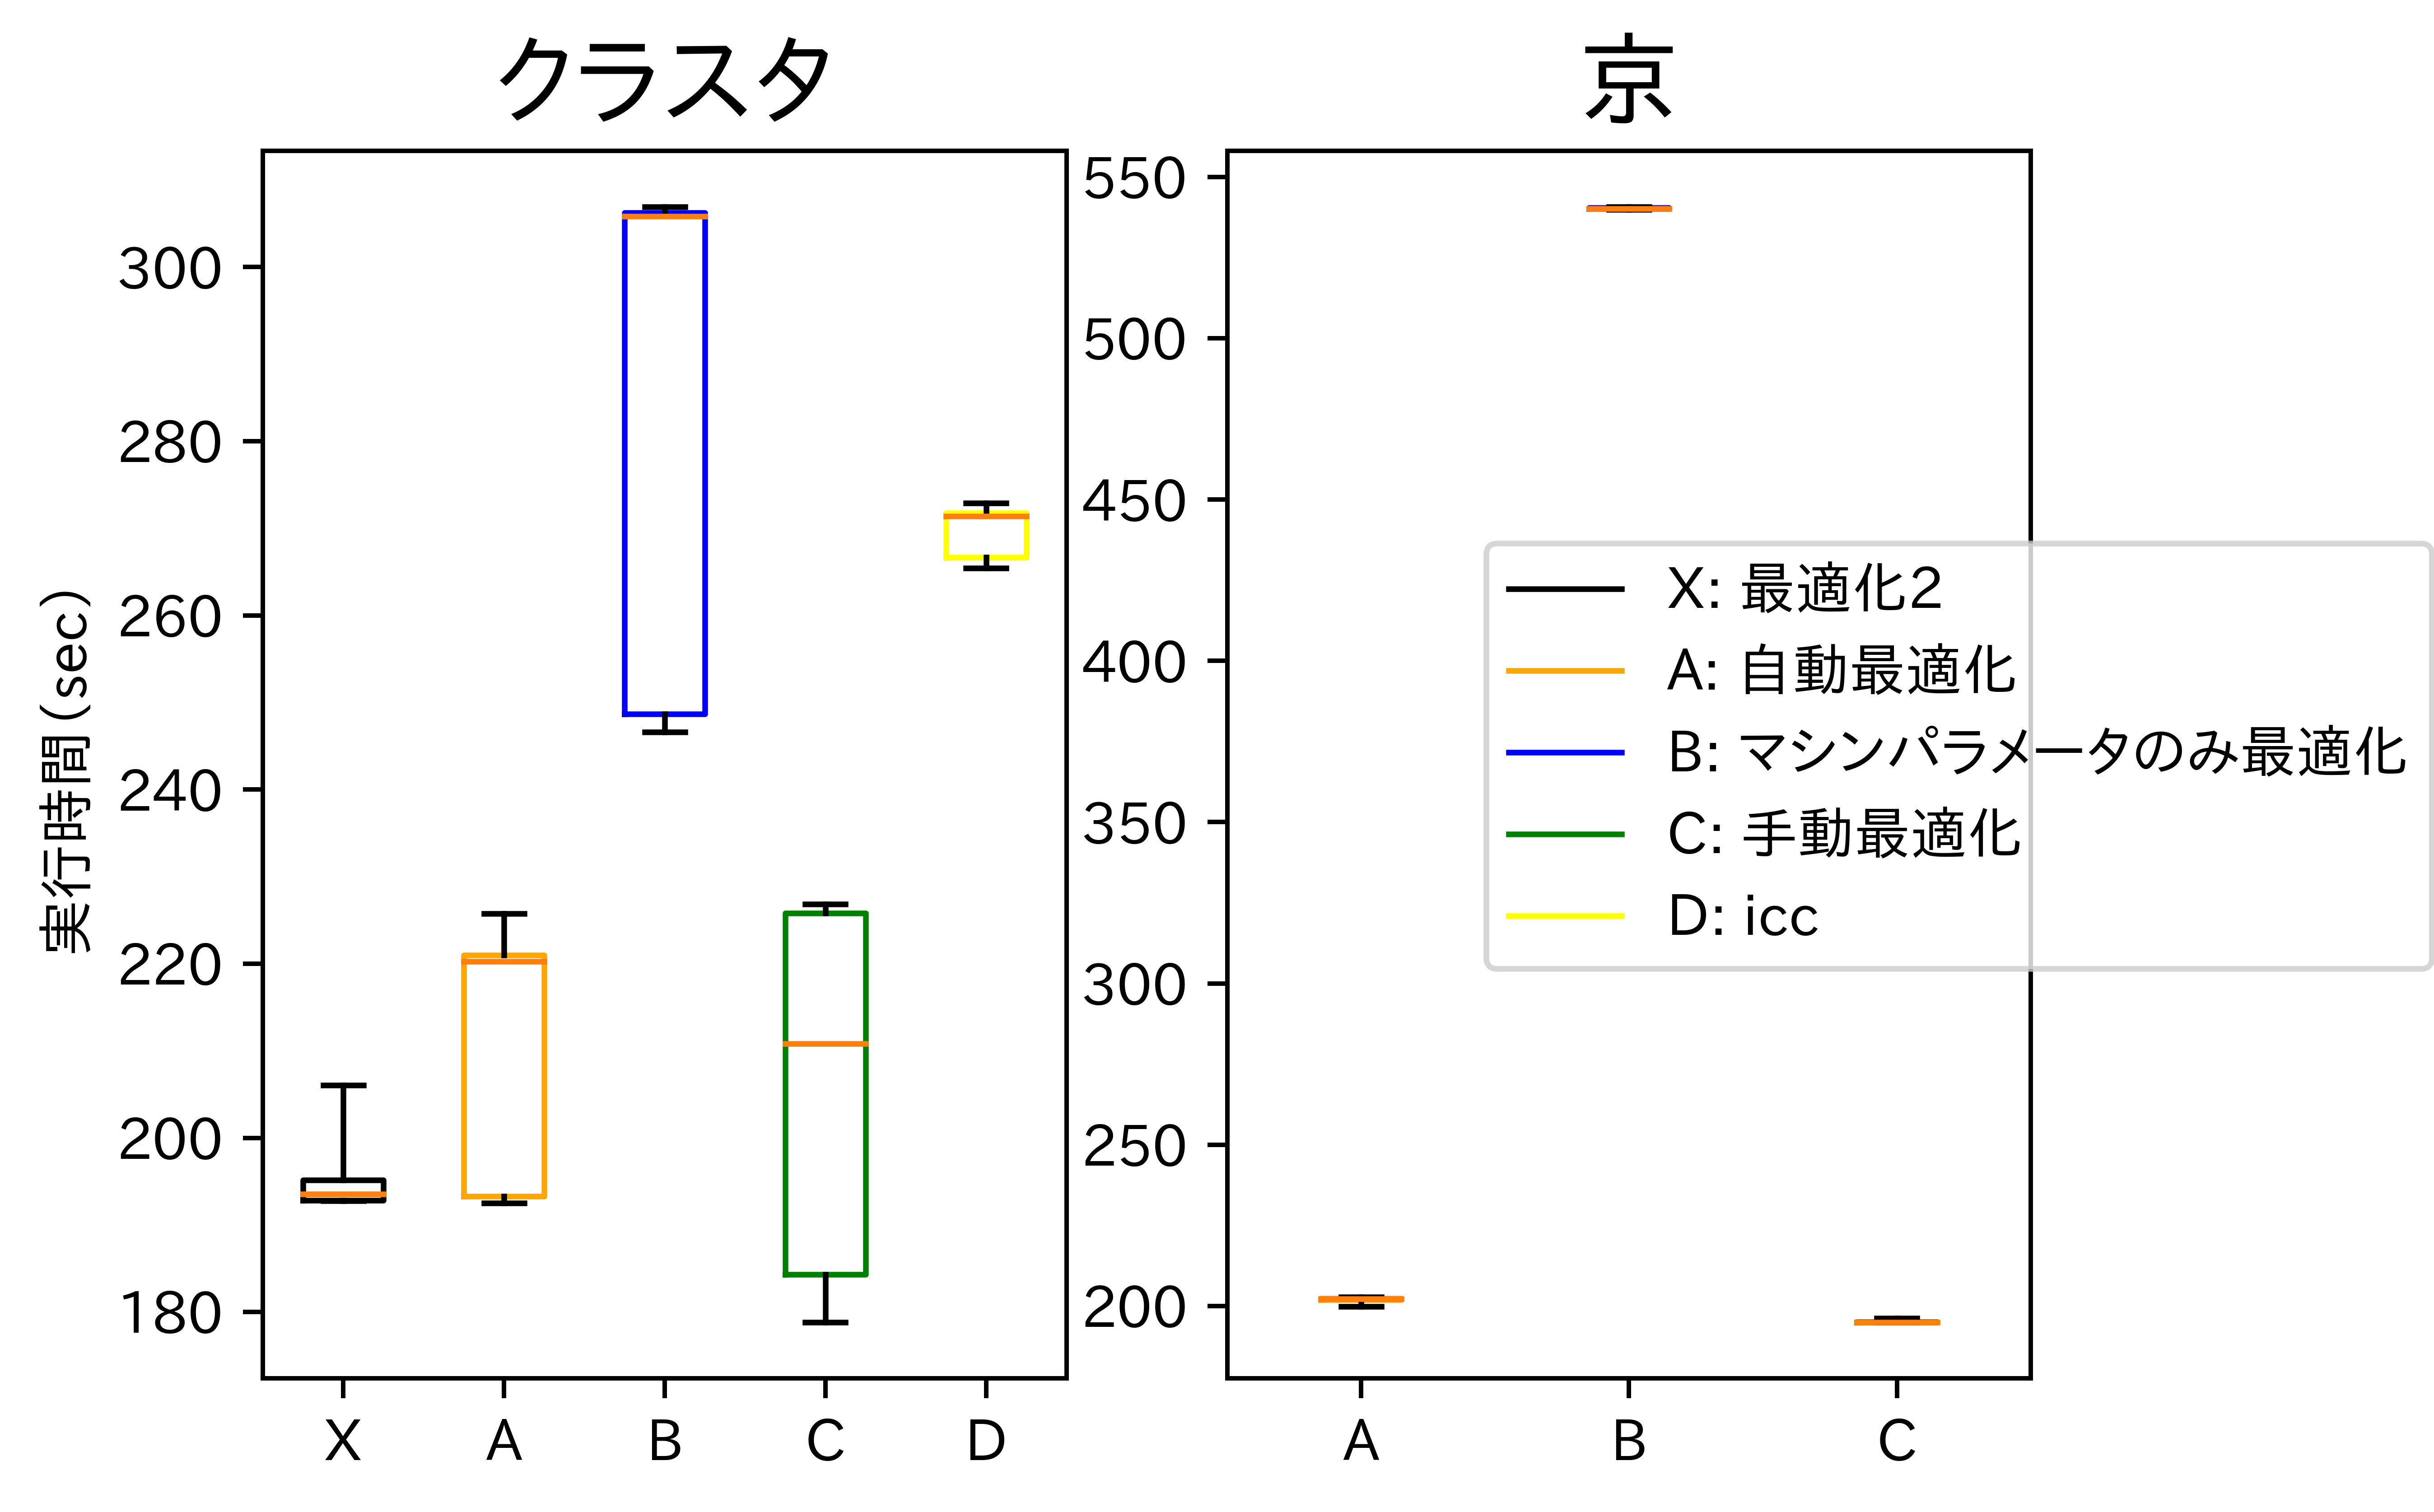

In [18]:
df_cluster = {
    "最適化2": [195.48532, 206.052672, 192.95713600000002, 192.78956700000001, 194.115993, 192.78315700000002],
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
}
table = {
    "最適化2": "X",
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "icc": "D"
}

df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
boxplot2(df_cluster, df_k, table, "compare-abst-2.png")

In [13]:
df = pd.read_csv("cluster/data/2018-02-02_18-04/result_candidate.csv")
# df['time_avg'] = (df['time'] + df['time0'] + df['time1'] + df['time2'] + df['time3'] + df['time4']) / 6.0
# df = df.sort_values(by=["time_avg"]).reset_index(drop=True)
# time = df['time_avg'].values
data = []
for i in range(len(df)):
    data.append([df.loc[i]['time'], df.loc[i]['time0'], df.loc[i]['time1'], df.loc[i]['time2'], df.loc[i]['time3'], df.loc[i]['time4']])
data

[[222.64070099999998,
  228.12998300000001,
  221.77797100000001,
  220.478364,
  223.58772799999997,
  222.23813999999999],
 [195.48532,
  206.052672,
  192.95713600000002,
  192.78956700000001,
  194.115993,
  192.78315700000002],
 [196.56509800000001,
  239.73681099999999,
  223.892246,
  223.299666,
  232.078654,
  225.97723100000002],
 [196.12431699999999,
  220.91713999999999,
  195.927898,
  196.15765200000001,
  196.18090800000002,
  196.34667400000001],
 [229.364465,
  220.48666200000002,
  221.75530099999997,
  222.87227300000001,
  222.32240299999998,
  222.302031],
 [221.07883799999999,
  195.89591999999999,
  219.800533,
  197.09759199999999,
  196.15948500000002,
  210.668813],
 [259.21299199999999,
  224.77756099999999,
  231.50042200000001,
  227.356256,
  233.188535,
  230.87202599999998],
 [201.20006899999998,
  200.00285700000001,
  199.97044199999999,
  199.83055100000001,
  200.65527800000001,
  224.210792]]

In [3]:
df = pd.read_csv("cluster/data/2018-02-03_19-06/result_candidate.csv")
# df['time_avg'] = (df['time'] + df['time0'] + df['time1'] + df['time2'] + df['time3'] + df['time4']) / 6.0
# df = df.sort_values(by=["time_avg"]).reset_index(drop=True)
# time = df['time_avg'].values
data = []
for i in range(len(df)):
    data.append([df.loc[i]['time'], df.loc[i]['time0'], df.loc[i]['time1'], df.loc[i]['time2'], df.loc[i]['time3'], df.loc[i]['time4']])
data


[[222.355096,
  231.06709700000002,
  232.33574700000003,
  230.40287499999999,
  232.21822599999999,
  230.96248500000002],
 [224.58747999999997,
  214.93095699999998,
  192.99787800000001,
  193.87028700000002,
  193.09795600000001,
  192.820808],
 [196.56304499999999,
  229.820088,
  230.63086200000001,
  232.29691400000002,
  231.14737000000002,
  235.24720099999999],
 [202.82925800000001,
  196.77604700000001,
  196.49760700000002,
  209.50873899999999,
  196.41557499999999,
  195.828847],
 [197.794028,
  233.69745099999997,
  236.73291099999997,
  232.63153599999998,
  233.57976499999998,
  247.30655899999999],
 [201.76754,
  196.311262,
  196.90846999999999,
  196.88351799999998,
  196.81917300000001,
  195.962062],
 [199.35369599999999,
  232.942554,
  233.952248,
  234.42097100000001,
  231.57592599999998,
  236.21844300000001],
 [203.154436,
  198.58505199999999,
  202.08695299999999,
  199.268259,
  202.108205,
  199.801334],
 [220.65018999999998,
  226.73580499999997,
  226